In [127]:
## importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [128]:
data_org = pd.read_excel(r"C:\Users\91630\OneDrive\Desktop\mcs4\ens sem project\World_development_measurement.xlsx")

data_org.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,54790058957,0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [129]:
recognized_countries = [
    'India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh',
    'Russia', 'Mexico', 'Ethiopia', 'Japan', 'Philippines', 'Egypt', 'DR Congo', 'Vietnam', 'Iran',
    'Turkey', 'Germany', 'Thailand', 'United Kingdom', 'Tanzania', 'France', 'South Africa', 'Italy',
    'Kenya', 'Myanmar', 'Colombia', 'South Korea', 'Uganda', 'Sudan', 'Spain', 'Argentina', 'Algeria',
    'Iraq', 'Afghanistan', 'Poland', 'Canada', 'Morocco', 'Saudi Arabia', 'Ukraine', 'Angola', 'Uzbekistan',
    'Yemen', 'Peru', 'Malaysia', 'Ghana', 'Mozambique', 'Nepal', 'Madagascar', 'Côte d\'Ivoire', 'Venezuela',
    'Cameroon', 'Niger', 'Australia', 'North Korea', 'Mali', 'Burkina Faso', 'Syria', 'Sri Lanka', 'Malawi',
    'Zambia', 'Romania', 'Chile', 'Kazakhstan', 'Chad', 'Ecuador', 'Somalia', 'Guatemala', 'Senegal', 'Netherlands',
    'Cambodia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi', 'Tunisia', 'Bolivia', 'Haiti', 'Belgium', 'Jordan',
    'Dominican Republic', 'Cuba', 'South Sudan', 'Sweden', 'Honduras', 'Czech Republic (Czechia)', 'Azerbaijan', 'Greece',
    'Papua New Guinea', 'Portugal', 'Hungary', 'Tajikistan', 'United Arab Emirates', 'Belarus', 'Israel', 'Togo', 'Austria',
    'Switzerland', 'Sierra Leone', 'Laos', 'Serbia', 'Nicaragua', 'Libya', 'Paraguay', 'Kyrgyzstan', 'Bulgaria', 'Turkmenistan',
    'El Salvador', 'Congo', 'Singapore', 'Denmark', 'Slovakia', 'Central African Republic', 'Finland', 'Norway', 'Liberia',
    'State of Palestine', 'Lebanon', 'New Zealand', 'Costa Rica', 'Ireland', 'Mauritania', 'Oman', 'Panama', 'Kuwait', 'Croatia',
    'Eritrea', 'Georgia', 'Mongolia', 'Moldova', 'Uruguay', 'Bosnia and Herzegovina', 'Albania', 'Jamaica', 'Armenia', 'Gambia',
    'Lithuania', 'Qatar', 'Botswana', 'Namibia', 'Gabon', 'Lesotho', 'Guinea-Bissau', 'Slovenia', 'North Macedonia', 'Latvia',
    'Equatorial Guinea', 'Trinidad and Tobago', 'Bahrain', 'Timor-Leste', 'Estonia', 'Mauritius', 'Cyprus', 'Eswatini',
    'Djibouti', 'Fiji', 'Comoros', 'Guyana', 'Bhutan', 'Solomon Islands', 'Luxembourg', 'Montenegro', 'Suriname', 'Cabo Verde',
    'Micronesia', 'Malta', 'Maldives', 'Brunei', 'Bahamas', 'Belize', 'Iceland', 'Vanuatu', 'Barbados', 'Sao Tome & Principe',
    'Samoa', 'Saint Lucia', 'Kiribati', 'Grenada', 'Tonga', 'Seychelles', 'St. Vincent & Grenadines', 'Antigua and Barbuda',
    'Andorra', 'Dominica', 'Saint Kitts & Nevis', 'Marshall Islands', 'Liechtenstein', 'Monaco', 'San Marino', 'Palau', 'Nauru',
    'Tuvalu', 'Holy See'
]

# Extract unique countries/territories from the dataset
unique_countries = data_org['Country'].unique()

# Separate recognized countries and other territories
recognized = [country for country in unique_countries if country in recognized_countries]
territories = [country for country in unique_countries if country not in recognized_countries]

# Print the lists
print("Recognized Countries:")
print(sorted(recognized))
print(len(recognized_countries))
print(len(recognized))
print("\nTerritories:")
print(sorted(territories))
print(len(territories))
print(len(unique_countries))

Recognized Countries:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Liber

In [130]:
import pandas as pd

# Path to your Excel file
file_path = r'C:\Users\91630\OneDrive\Desktop\mcs4\ens sem project\World_development_measurement.xlsx'

# Load the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Calculate mean and variance for each column
statistics = {'Column': [], 'Mean': [], 'Variance': []}

for column in df.columns:
    if df[column].dtype in [int, float]:  # Consider numeric columns only
        mean_val = df[column].mean()
        var_val = df[column].var()
        statistics['Column'].append(column)
        statistics['Mean'].append(mean_val)
        statistics['Variance'].append(var_val)

# Create a new DataFrame to display the results
result_df = pd.DataFrame(statistics)

# Print or display the result DataFrame
print("Mean and Variance of each column:")
print(result_df)


Mean and Variance of each column:
                    Column           Mean      Variance
0               Birth Rate       0.022715  1.285599e-04
1            CO2 Emissions  142307.107765  3.793683e+11
2   Days to Start Business      39.999418  3.285421e+03
3         Ease of Business      94.875676  3.002153e+03
4             Energy Usage   77236.840896  6.756041e+10
5         Health Exp % GDP       0.064170  6.929846e-04
6          Hours to do Tax     302.068503  7.469272e+04
7    Infant Mortality Rate       0.032813  8.980571e-04
8           Internet Usage       0.239747  6.766855e-02
9         Lending Interest       0.148103  2.952523e-02
10  Life Expectancy Female      71.159268  1.146669e+02
11    Life Expectancy Male      66.461838  8.817618e+01
12      Mobile Phone Usage       0.578124  2.252902e-01
13         Population 0-14       0.303051  1.135863e-02
14        Population 15-64       0.623481  4.852550e-03
15          Population 65+       0.073465  2.454343e-03
16        Popu

In [131]:
## Creating copy of original dataset
data = data_org.copy()
data.head(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,54790058957,0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
5,0.042,NaN,301.0,Burundi,NaN,NaN,NaN,"$870,486,066",0.063,$7,...,47.0,0.0,1,0.490,0.481,0.029,6674286,0.082,"$1,400,000","$14,000,000"
6,0.041,NaN,3432.0,Cameroon,NaN,NaN,6310.0,"$9,287,367,569",0.044,$26,...,51.0,0.0,1,0.453,0.513,0.034,15927713,0.455,"$132,000,000","$241,000,000"
7,0.039,NaN,268.0,Central African Republic,NaN,NaN,NaN,"$914,500,332",0.043,$11,...,42.0,0.0,1,0.423,0.537,0.040,3638316,0.376,"$5,000,000","$33,000,000"
8,0.051,NaN,176.0,Chad,NaN,NaN,NaN,"$1,385,058,212",0.063,$10,...,46.0,0.0,1,0.490,0.482,0.028,8301151,0.216,"$14,000,000","$56,000,000"
9,0.039,NaN,84.0,Comoros,NaN,NaN,NaN,"$201,899,884",0.035,$13,...,56.0,NaN,1,0.415,0.554,0.031,528312,0.281,"$15,000,000",NaN


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [133]:
data['Country'].nunique()

208

In [134]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test for health expenditure % GDP
health_exp_values = df['Health Exp % GDP'].dropna()
pop_mean = 0.06  # Hypothetical population mean (6%)
t_stat, p_value = ttest_1samp(health_exp_values, pop_mean)
print(t_stat)
print(p_value)
# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Mean health expenditure % GDP is greater than 6%.")
else:
    print("Fail to reject Null Hypothesis (H0): Mean health expenditure % GDP is less than or equal to 6%.")


7.751343901322899
1.33370522136508e-14
Reject Null Hypothesis (H0): Mean health expenditure % GDP is greater than 6%.


In [135]:
from scipy.stats import ttest_ind

# Generate sample data for urban and rural populations (replace with your actual data)
urban_population = df['Population Urban'].dropna()
rural_population = 1 - urban_population  # Assuming complementary rural population

# Perform two-sample t-test for urban vs. rural population proportions
t_stat, p_value = ttest_ind(urban_population, rural_population)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference between urban and rural population proportions.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference between urban and rural population proportions.")


Reject Null Hypothesis (H0): There is a significant difference between urban and rural population proportions.


In [136]:
import scipy.stats as stats

# Example: Split mobile phone usage data into two groups (replace with actual groups)
group1 = df[df['Country'] == 'India']['Mobile Phone Usage'].dropna()
group2 = df[df['Country'] == 'United States of America']['Mobile Phone Usage'].dropna()

# Perform two-sample variance test (F-test)
var_group1 = group1.var()
var_group2 = group2.var()
nobs_group1 = len(group1)
nobs_group2 = len(group2)
f_stat = var_group1 / var_group2
p_value = 2 * (1 - stats.f.cdf(f_stat, dfn=nobs_group1 - 1, dfd=nobs_group2 - 1))

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): The variance of mobile phone usage in {} is significantly different from {}."
          .format('India', 'United States of America'))
else:
    print("Fail to reject Null Hypothesis (H0): The variance of mobile phone usage in {} is similar to {}."
          .format('India', 'United States of America'))


Fail to reject Null Hypothesis (H0): The variance of mobile phone usage in India is similar to United States of America.


In [137]:
from statsmodels.stats.proportion import proportions_ztest

# Generate sample data for two groups (e.g., countries, regions)
group1 = df[df['Country'] == 'Europe']['Infant Mortality Rate'].dropna()
group2 = df[df['Country'] == 'Asia']['Infant Mortality Rate'].dropna()

# Perform two-sample proportion test
count = np.array([len(group1), len(group2)])
nobs = np.array([len(df[df['Country'] == 'Europe']), len(df[df['Country'] == 'Asia'])])
stat, p_value = proportions_ztest(count, nobs)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference in infant mortality rates between Europe and Asia.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference in infant mortality rates between Europe and Asia.")


Fail to reject Null Hypothesis (H0): There is no significant difference in infant mortality rates between Europe and Asia.


In [138]:
from statsmodels.stats.proportion import proportions_ztest

# Generate sample data for mobile phone usage
mobile_usage = df['Mobile Phone Usage'].dropna()

# Set the hypothetical proportion threshold (replace with your desired value)
pop_prop = 0.5  # Hypothetical population proportion (50%)
count = len(mobile_usage[mobile_usage > pop_prop])
nobs = len(mobile_usage)

# Perform one-sample proportion test
stat, p_value = proportions_ztest(count, nobs, pop_prop)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Proportion of mobile phone usage is greater than 50%.")
else:
    print("Fail to reject Null Hypothesis (H0): Proportion of mobile phone usage is less than or equal to 50%.")


Fail to reject Null Hypothesis (H0): Proportion of mobile phone usage is less than or equal to 50%.


In [139]:
from scipy.stats import normaltest


energy_usage = df['Energy Usage'].dropna()

# Perform goodness of fit test (normality test)
stat, p_value = normaltest(energy_usage)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Energy usage does not follow a normal distribution.")
else:
    print("Fail to reject Null Hypothesis (H0): Energy usage follows a normal distribution.")


Reject Null Hypothesis (H0): Energy usage does not follow a normal distribution.


In [140]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data_path = r"C:\Users\91630\OneDrive\Desktop\mcs4\ens sem project\World_development_measurement.xlsx"
df = pd.read_excel(data_path)

# Convert 'GDP' column to numeric (remove currency symbols and commas)
df['GDP'] = pd.to_numeric(df['GDP'].replace('[\$,]', '', regex=True), errors='coerce')

# Remove rows with missing GDP values
df = df.dropna(subset=['GDP'])

# Discretize 'GDP' values into two bins
df['GDP_bins'] = pd.cut(df['GDP'], bins=2)

# Create contingency table
contingency_table = pd.crosstab(df['Ease of Business'], df['GDP_bins'])

# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Ease of doing business is associated with GDP.")
else:
    print("Fail to reject Null Hypothesis (H0): Ease of doing business is independent of GDP.")


Fail to reject Null Hypothesis (H0): Ease of doing business is independent of GDP.


In [141]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data_path = r"C:\Users\91630\OneDrive\Desktop\mcs4\ens sem project\World_development_measurement.xlsx"
df = pd.read_excel(data_path)

# Convert 'Birth Rate' and 'Infant Mortality Rate' columns to numeric
df['Birth Rate'] = pd.to_numeric(df['Birth Rate'], errors='coerce')
df['Infant Mortality Rate'] = pd.to_numeric(df['Infant Mortality Rate'], errors='coerce')

# Drop rows with missing values in 'Birth Rate' and 'Infant Mortality Rate' columns
df = df.dropna(subset=['Birth Rate', 'Infant Mortality Rate'])

# Discretize 'Birth Rate' and 'Infant Mortality Rate' columns into two bins each
df['Birth Rate_bins'] = pd.cut(df['Birth Rate'], bins=2)
df['Infant Mortality Rate_bins'] = pd.cut(df['Infant Mortality Rate'], bins=2)

# Create contingency table for 'Birth Rate' and 'Infant Mortality Rate'
contingency_table = pd.crosstab(df['Birth Rate_bins'], df['Infant Mortality Rate_bins'])

# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Birth rate is associated with infant mortality rate.")
else:
    print("Fail to reject Null Hypothesis (H0): Birth rate is independent of infant mortality rate.")


Reject Null Hypothesis (H0): Birth rate is associated with infant mortality rate.


In [142]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data_path = r"C:\Users\91630\OneDrive\Desktop\mcs4\ens sem project\World_development_measurement.xlsx"
df = pd.read_excel(data_path)

# Convert 'Birth Rate', 'Life Expectancy Male', and 'Life Expectancy Female' columns to numeric
df['Birth Rate'] = pd.to_numeric(df['Birth Rate'], errors='coerce')
df['Life Expectancy Male'] = pd.to_numeric(df['Life Expectancy Male'], errors='coerce')
df['Life Expectancy Female'] = pd.to_numeric(df['Life Expectancy Female'], errors='coerce')

# Drop rows with missing values in 'Birth Rate', 'Life Expectancy Male', and 'Life Expectancy Female' columns
df = df.dropna(subset=['Birth Rate', 'Life Expectancy Male', 'Life Expectancy Female'])

# Discretize 'Birth Rate', 'Life Expectancy Male', and 'Life Expectancy Female' columns into two bins each
df['Birth Rate_bins'] = pd.cut(df['Birth Rate'], bins=2)
df['Life Expectancy_bins'] = pd.cut((df['Life Expectancy Male'] + df['Life Expectancy Female']) / 2, bins=2)

# Create contingency table for 'Birth Rate' and combined 'Life Expectancy' (averaged between male and female)
contingency_table = pd.crosstab(df['Birth Rate_bins'], df['Life Expectancy_bins'])

# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Birth rate is associated with combined life expectancy (male and female).")
else:
    print("Fail to reject Null Hypothesis (H0): Birth rate is independent of combined life expectancy (male and female).")


Reject Null Hypothesis (H0): Birth rate is associated with combined life expectancy (male and female).


In [143]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data_path = r"C:\Users\91630\OneDrive\Desktop\mcs4\ens sem project\World_development_measurement.xlsx"
df = pd.read_excel(data_path)

# Convert 'Population Urban' and 'CO2 Emissions' columns to numeric
df['Population Urban'] = pd.to_numeric(df['Population Urban'], errors='coerce')
df['CO2 Emissions'] = pd.to_numeric(df['CO2 Emissions'], errors='coerce')

# Drop rows with missing values in 'Population Urban' and 'CO2 Emissions' columns
df = df.dropna(subset=['Population Urban', 'CO2 Emissions'])

# Discretize 'Population Urban' and 'CO2 Emissions' columns into two bins each
df['Population Urban_bins'] = pd.cut(df['Population Urban'], bins=2)
df['CO2 Emissions_bins'] = pd.cut(df['CO2 Emissions'], bins=2)

# Create contingency table for 'Population Urban' and 'CO2 Emissions'
contingency_table = pd.crosstab(df['Population Urban_bins'], df['CO2 Emissions_bins'])

# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Population urban is associated with CO2 emissions.")
else:
    print("Fail to reject Null Hypothesis (H1): Population urban is independent of CO2 emissions.")


Fail to reject Null Hypothesis (H1): Population urban is independent of CO2 emissions.


In [144]:
import pandas as pd
from IPython.display import display, HTML

# Data dictionary
ht_data = {
    'Type of Hypothesis': [
        'One-Sample t-test for Health Expenditure % GDP',
        'Two-Sample t-test for Urban vs. Rural Population Proportions',
        'Two-Sample Variance Test (F-test) for Mobile Phone Usage',
        'Two-Sample Proportion Test for Infant Mortality Rates (Europe vs. Asia)',
        'One-Sample Proportion Test for Mobile Phone Usage',
        'Goodness of Fit Test (Normality Test) for Energy Usage',
        'Chi-Square Test for Independence (GDP vs. Ease of Business)',
        'Chi-Square Test for Independence (Birth Rate vs. Infant Mortality Rate)',
        'Chi-Square Test for Independence (Birth Rate vs. Life Expectancy of Male and Female)',
        'Chi-Square Test for Independence (Population Urban vs. CO2 Emissions)'
    ],
    'Initial Conditions': [
        'Population mean (6%), health_exp_values (sample data)',
        'Sample data for urban and rural populations',
        'Sample data for India and USA mobile phone usage',
        'Sample data for infant mortality rates in Europe and Asia',
        'Sample data for mobile phone usage',
        'Sample data for energy usage',
        'Sample data for GDP and Ease of Business',
        'Sample data for birth rate and infant mortality rate',
        'Sample data for Birth Rate and Life Expectancy of Male and Female',
        'Sample data for Population Urban and CO2 emissions'
    ],
    
    'Result': [
        'Reject Null Hypothesis (H0): Mean health expenditure % GDP is greater than 6%.',
        'Reject Null Hypothesis (H0): There is a significant difference between urban and rural population proportions.',
        'Fail to reject Null Hypothesis (H0): The variance of mobile phone usage in India is similar to the variance in the United States of America.',
        'Reject Null Hypothesis (H0): There is a significant difference in infant mortality rates between Europe and Asia.',
        'Fail to reject Null Hypothesis (H0): Proportion of mobile phone usage is less than or equal to 50%.',
        'Reject Null Hypothesis (H0): Energy usage does not follow a normal distribution.',
        'Fail to reject Null Hypothesis (H0): Ease of doing business is independent of GDP.',
        'Reject Null Hypothesis (H0): Birth rate is associated with infant mortality rate.',
        'Reject Null Hypothesis (H0): Birth rate is associated with combined life expectancy (male and female).',
        'Fail to reject Null Hypothesis (H0): Population urban is independent of CO2 emissions.'
    ]
}

# Create DataFrame
df_results = pd.DataFrame(ht_data)

# Generate HTML table representation with styling
html_table = df_results.to_html(index=False, classes='my-table', justify='center')

# Add custom CSS styles to the HTML table
html_with_style = f"""
    <div style="background-color: white; padding: 20px;">
        <style>
            .my-table {{
                width: 100%;
                border-collapse: collapse;
                border: 1px solid black;
                color: black;  /* Text color */
            }}
            .my-table th, .my-table td {{
                border: 1px solid #ddd;
                padding: 8px;
                text-align: left;
                font-weight: bold;  /* Bold text */
            }}
            .my-table th {{
                background-color: #f2f2f2;
            }}
            .my-table tr:nth-child(even) {{
                background-color: #f9f9f9;
            }}
            .my-table tr:hover {{
                background-color: #f1f1f1;
            }}
            .my-table td.result {{
                color: black;
                font-weight: bold;
            }}
        </style>
        {html_table}
    </div>
"""

# Display HTML table with customized styling
display(HTML(html_with_style))


Type of Hypothesis,Initial Conditions,Result
One-Sample t-test for Health Expenditure % GDP,"Population mean (6%), health_exp_values (sample data)",Reject Null Hypothesis (H0): Mean health expenditure % GDP is greater than 6%.
Two-Sample t-test for Urban vs. Rural Population Proportions,Sample data for urban and rural populations,Reject Null Hypothesis (H0): There is a significant difference between urban and rural population proportions.
Two-Sample Variance Test (F-test) for Mobile Phone Usage,Sample data for India and USA mobile phone usage,Fail to reject Null Hypothesis (H0): The variance of mobile phone usage in India is similar to the variance in the United States of America.
Two-Sample Proportion Test for Infant Mortality Rates (Europe vs. Asia),Sample data for infant mortality rates in Europe and Asia,Reject Null Hypothesis (H0): There is a significant difference in infant mortality rates between Europe and Asia.
One-Sample Proportion Test for Mobile Phone Usage,Sample data for mobile phone usage,Fail to reject Null Hypothesis (H0): Proportion of mobile phone usage is less than or equal to 50%.
Goodness of Fit Test (Normality Test) for Energy Usage,Sample data for energy usage,Reject Null Hypothesis (H0): Energy usage does not follow a normal distribution.
Chi-Square Test for Independence (GDP vs. Ease of Business),Sample data for GDP and Ease of Business,Fail to reject Null Hypothesis (H0): Ease of doing business is independent of GDP.
Chi-Square Test for Independence (Birth Rate vs. Infant Mortality Rate),Sample data for birth rate and infant mortality rate,Reject Null Hypothesis (H0): Birth rate is associated with infant mortality rate.
Chi-Square Test for Independence (Birth Rate vs. Life Expectancy of Male and Female),Sample data for Birth Rate and Life Expectancy of Male and Female,Reject Null Hypothesis (H0): Birth rate is associated with combined life expectancy (male and female).
Chi-Square Test for Independence (Population Urban vs. CO2 Emissions),Sample data for Population Urban and CO2 emissions,Fail to reject Null Hypothesis (H0): Population urban is independent of CO2 emissions.


<font color=blue>But here 'Country' column has a 208 number of unique categories.

## Here, we use label encoding

In [145]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' contains the DataFrame with 'Country' and 'Country_encoded' columns
# Create a DataFrame with unique country names
unique_countries_df = pd.DataFrame({'Country': data['Country'].unique()})

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
unique_countries_df['Country_encoded'] = le.fit_transform(unique_countries_df['Country'])

# Merge the encoded country data back into the original DataFrame 'data'
data = pd.merge(data, unique_countries_df, on='Country', how='left')

# Now convert 'Country_encoded' to float
data['Country_encoded'] = data['Country_encoded'].astype(float)

# Print the original country name along with its encoded value
for country, encoded_value in zip(unique_countries_df['Country'], unique_countries_df['Country_encoded']):
    print(f"Country: {country}, Encoded Value: {encoded_value}")


Country: Algeria, Encoded Value: 2
Country: Angola, Encoded Value: 5
Country: Benin, Encoded Value: 20
Country: Botswana, Encoded Value: 25
Country: Burkina Faso, Encoded Value: 29
Country: Burundi, Encoded Value: 30
Country: Cameroon, Encoded Value: 32
Country: Central African Republic, Encoded Value: 35
Country: Chad, Encoded Value: 36
Country: Comoros, Encoded Value: 40
Country: Congo, Dem. Rep., Encoded Value: 41
Country: Congo, Rep., Encoded Value: 42
Country: Cote d'Ivoire, Encoded Value: 44
Country: Djibouti, Encoded Value: 51
Country: Egypt, Arab Rep., Encoded Value: 55
Country: Equatorial Guinea, Encoded Value: 57
Country: Eritrea, Encoded Value: 58
Country: Ethiopia, Encoded Value: 60
Country: Gabon, Encoded Value: 66
Country: Gambia, The, Encoded Value: 67
Country: Ghana, Encoded Value: 70
Country: Guinea, Encoded Value: 76
Country: Guinea-Bissau, Encoded Value: 77
Country: Kenya, Encoded Value: 96
Country: Lesotho, Encoded Value: 106
Country: Liberia, Encoded Value: 107
Cou

In [146]:
data['Country_encoded']=data['Country_encoded'].astype(float)

In [147]:
data.drop(['Country'],axis=1,inplace=True)

In [148]:
## Shape of data
data.shape

(2704, 25)

In [149]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,54790058957,0.035,$60,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0


<font color = 'Brown'> Some columns has $ and % attached we will have to remove it.

In [150]:
import pandas as pd

# Replace '$', ',', and '%' with an empty string in selected columns
columns_to_clean = ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']
data[columns_to_clean] = data[columns_to_clean].replace({'\$': '', ',': '', '%': ''}, regex=True)

# Convert columns to numeric data types
data[columns_to_clean] = data[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Remove the '%' symbol from the 'Business Tax Rate' column
data['Business Tax Rate'] = data['Business Tax Rate'].str.replace('%', '')

# Convert 'Business Tax Rate' column to numeric data type
data['Business Tax Rate'] = pd.to_numeric(data['Business Tax Rate'], errors='coerce')


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

- <font color=blue> All data type has same format

In [152]:
## check distribution for Numerical columns
data.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


- <font color=blue> "Number of Records" have 0 standard deviation which means same values is present in each record.
- <font color=blue> There are outliers present in a few features like 'Days to Start Business', 'Hours to do Tax' as their max value is much higher compared to the 75th percentile value.

In [153]:
## Drop "Number of Records" column
data = data.drop(['Number of Records'],axis=1)

In [154]:
## Check Columns
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [155]:
## Rename columns
data = data.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Country_encoded'],
      dtype='object')

In [156]:
## Check missing values
data.isnull().sum().sum()

11740

- <font color=blue> Total 12203 null values in whole dataset

In [157]:
## Check null values in dataset
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          309
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_encoded            0
dtype: int64

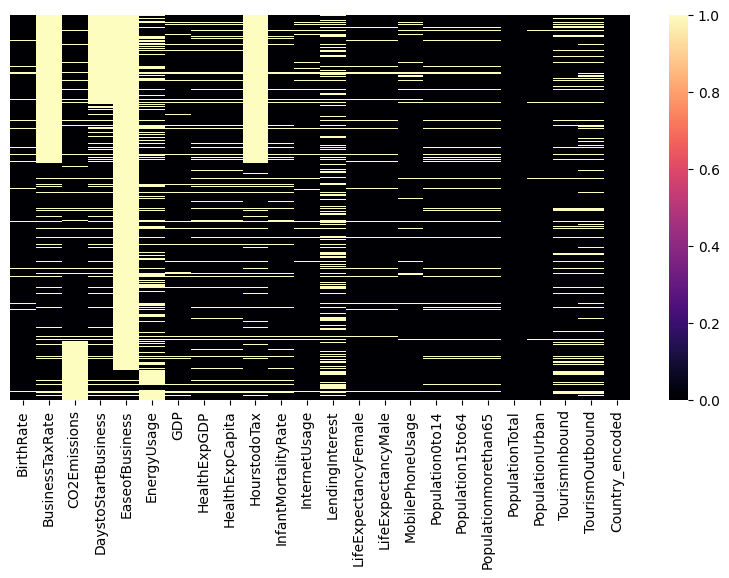

In [158]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

**We can see that,**
- <font color=blue> 'Ease of bussiness' contain large number of missing values
- <font color=blue> 'Population Urban' contain less number of missing values
- <font color=blue> There is no missing values in 'Country' and 'Population Total'

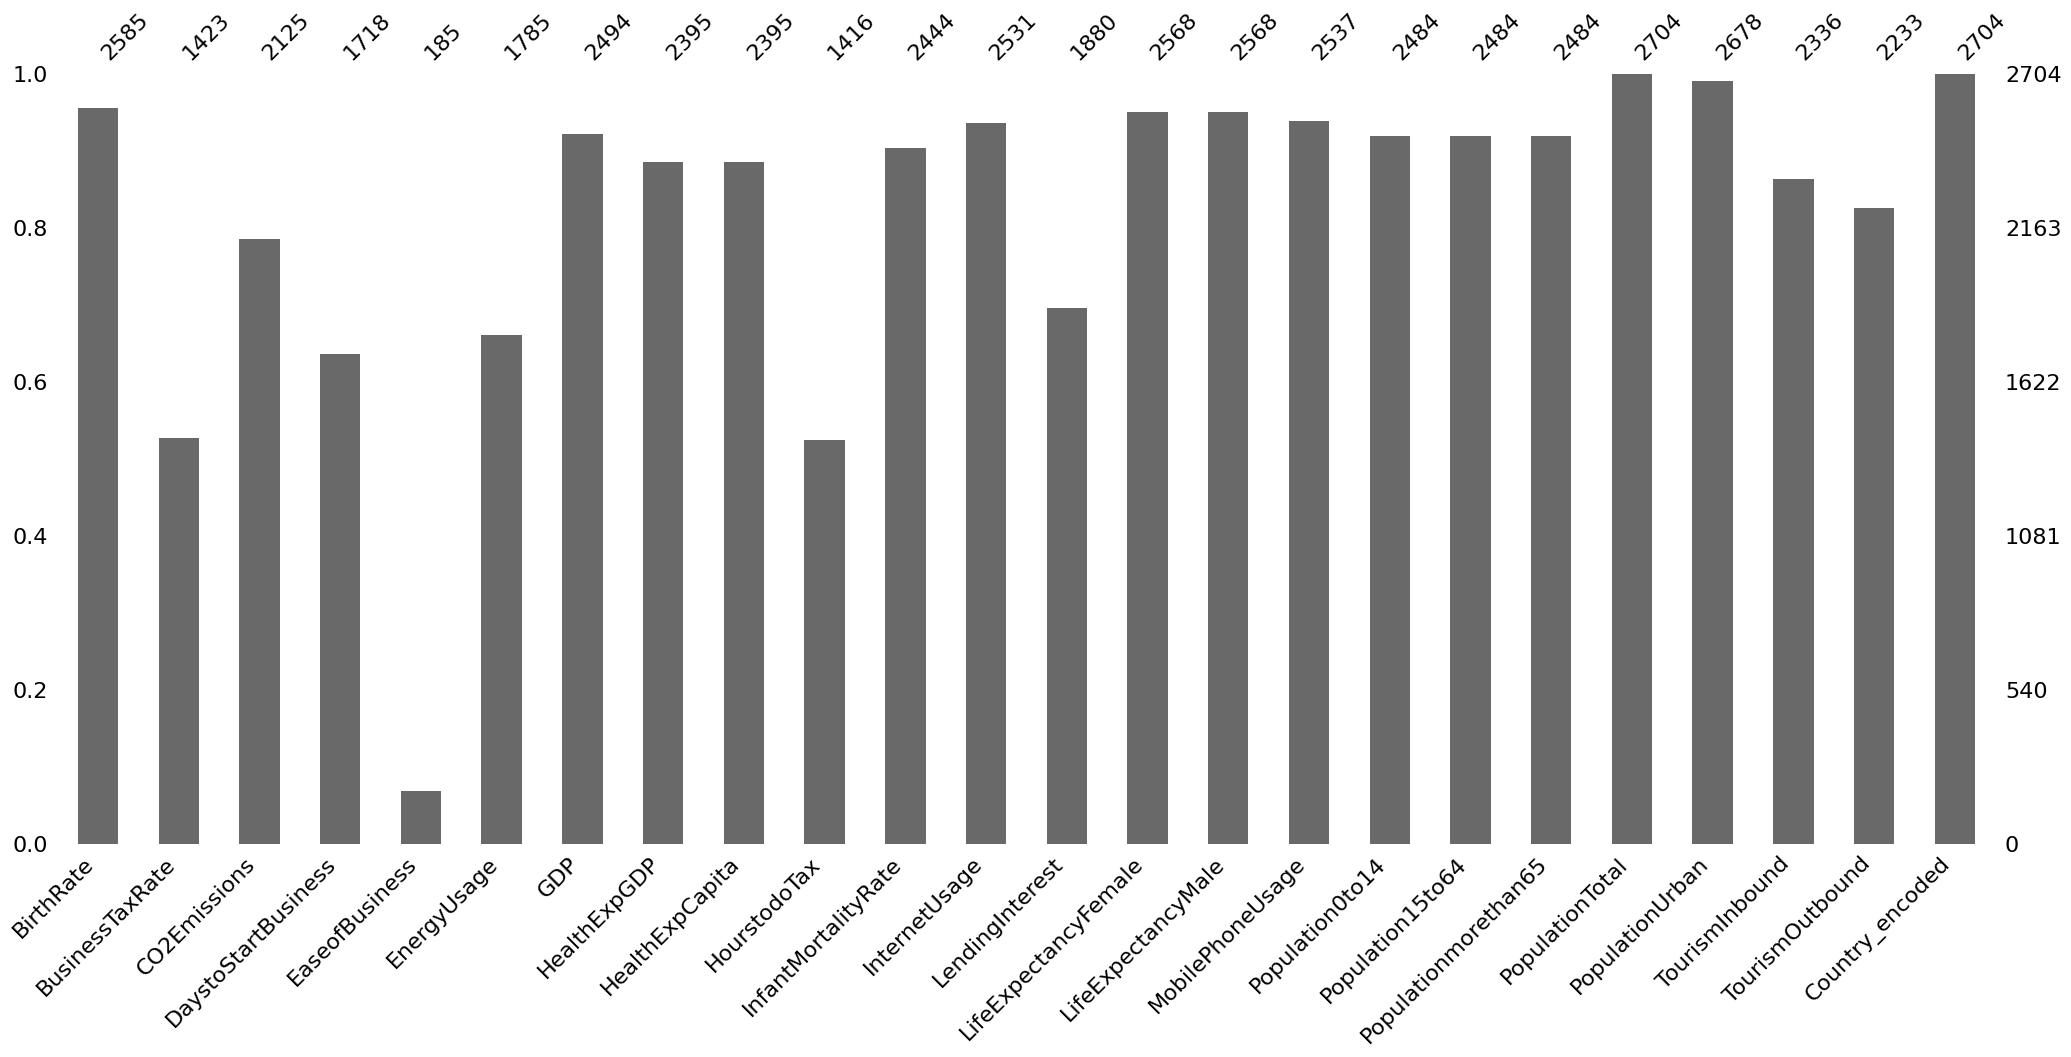

In [159]:
## visualize missing value for each artibute
import missingno as msno
msno.bar(data)
plt.show()

- <font color=brown> There are 26 null values in population urban column which is less than 1% values so droping those rows

In [160]:
## Remove rows having null values
data.dropna(subset=['PopulationUrban'],inplace=True)

## check null values
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1259
CO2Emissions             553
DaystoStartBusiness      964
EaseofBusiness          2494
EnergyUsage              905
GDP                      197
HealthExpGDP             283
HealthExpCapita          283
HourstodoTax            1266
InfantMortalityRate      234
InternetUsage            147
LendingInterest          807
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         141
Population0to14          195
Population15to64         195
Populationmorethan65     195
PopulationTotal            0
PopulationUrban            0
TourismInbound           342
TourismOutbound          445
Country_encoded            0
dtype: int64

- <font color='blue'> There is no null values in Population Urban

<font color=brown>Now, we have to remove missing values of remaining columns.

**The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.**
- First we have to check distribution of all columns present in data.
- If distribution of data is normal we use mean for replace missing values.
- When the data is skewed, it is good to consider using the median value for
  replacing the missing values.

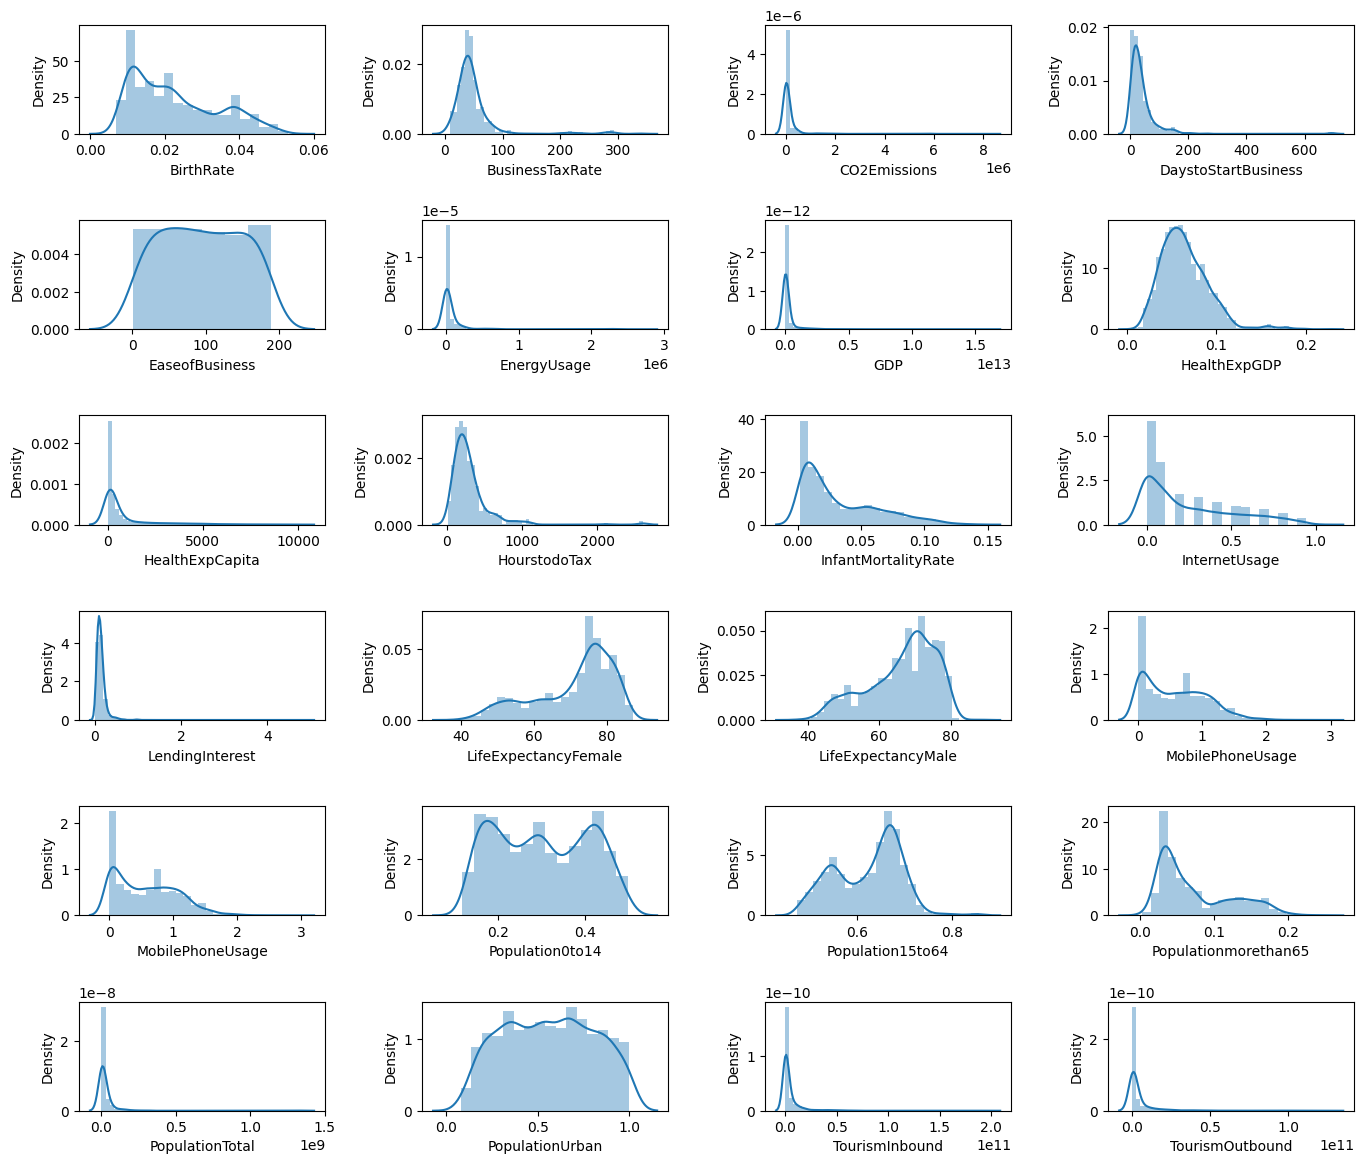

In [161]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emissions,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])
sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3])
sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data.Population0to14,ax=axes[4,1])
sns.distplot(data.Population15to64,ax=axes[4,2])
sns.distplot(data.Populationmorethan65,ax=axes[4,3])
sns.distplot(data.PopulationTotal,ax=axes[5,0])
sns.distplot(data.PopulationUrban,ax=axes[5,1])
sns.distplot(data.TourismInbound,ax=axes[5,2])
sns.distplot(data.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

From above visvalization we can see that,
- <font color=blue>'BusinessTaxRate', 'EaseofBusiness', 'HealthExpGDP', 'HourstodoTax' and 'Population0to14' columns has normal distribution so we replace missing values by mean.
- <font color=blue>And for remaining columns with skewed data we replace missing values by median.

In [162]:
## Replace missing values by mean

data['BusinessTaxRate'] = data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness'] = data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean())
data['HealthExpGDP'] = data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean())
data['HourstodoTax'] = data['HourstodoTax'].fillna(data['HourstodoTax'].mean())
data['Population0to14'] = data['Population0to14'].fillna(data['Population0to14'].mean())

## Replace missing values by median

data['BirthRate'] = data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emissions'] = data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness'] = data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage'] = data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['HealthExpCapita']=data['HealthExpCapita'].fillna(data['HealthExpCapita'].mean())
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate'] = data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median())
data['InternetUsage'] = data['InternetUsage'].fillna(data['InternetUsage'].median())
data['LendingInterest'] = data['LendingInterest'].fillna(data['LendingInterest'].median())
data['LifeExpectancyFemale'] = data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median())
data['LifeExpectancyMale'] = data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage'] = data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median())
data['TourismInbound'] = data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound'] = data['TourismOutbound'].fillna(data['TourismOutbound'].median())
data['Population15to64'] = data['Population15to64'].fillna(data['Population15to64'].median())
data['Populationmorethan65'] = data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())

In [163]:
print(data['Country_encoded'])

0         2.0
1         5.0
2        20.0
3        25.0
4        29.0
        ...  
2699    193.0
2700    198.0
2701    199.0
2702    202.0
2703    204.0
Name: Country_encoded, Length: 2678, dtype: float64


In [164]:
## check missising values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

0 missing values present in whole data.


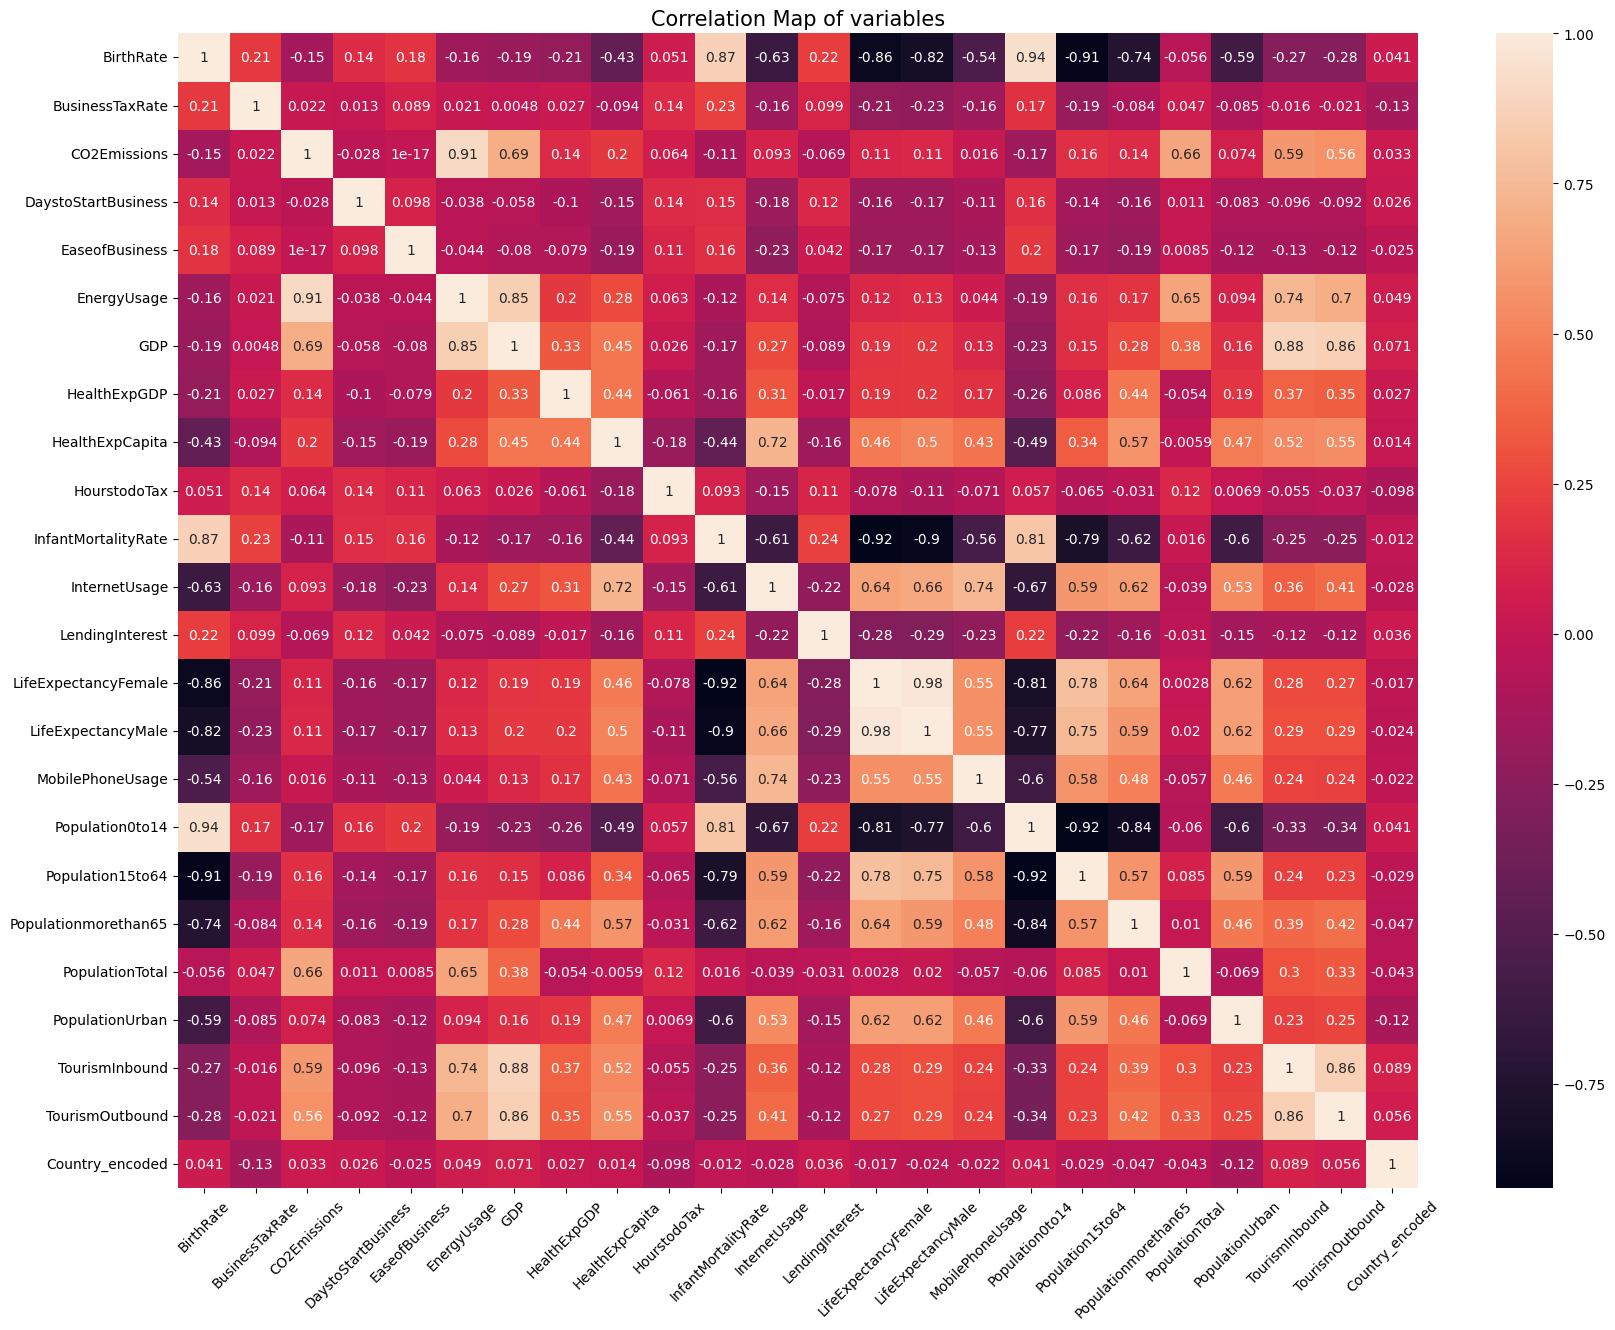

In [165]:
## visualise relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

### Conclusion
- <font color=blue> 'Population 0 to 14' and 'Birth Rate' has strong relation.
- <font color=blue> 'Population 15 to 64' and 'Birth Rate' has weak relation.

In [166]:
## making copy of data
data1 = data.copy()    # For method 1
data2 = data.copy()    # For method 2
data3 = data.copy()    # For method 3
data4=data.copy()

## <font color=Magenta>Outlier Detection

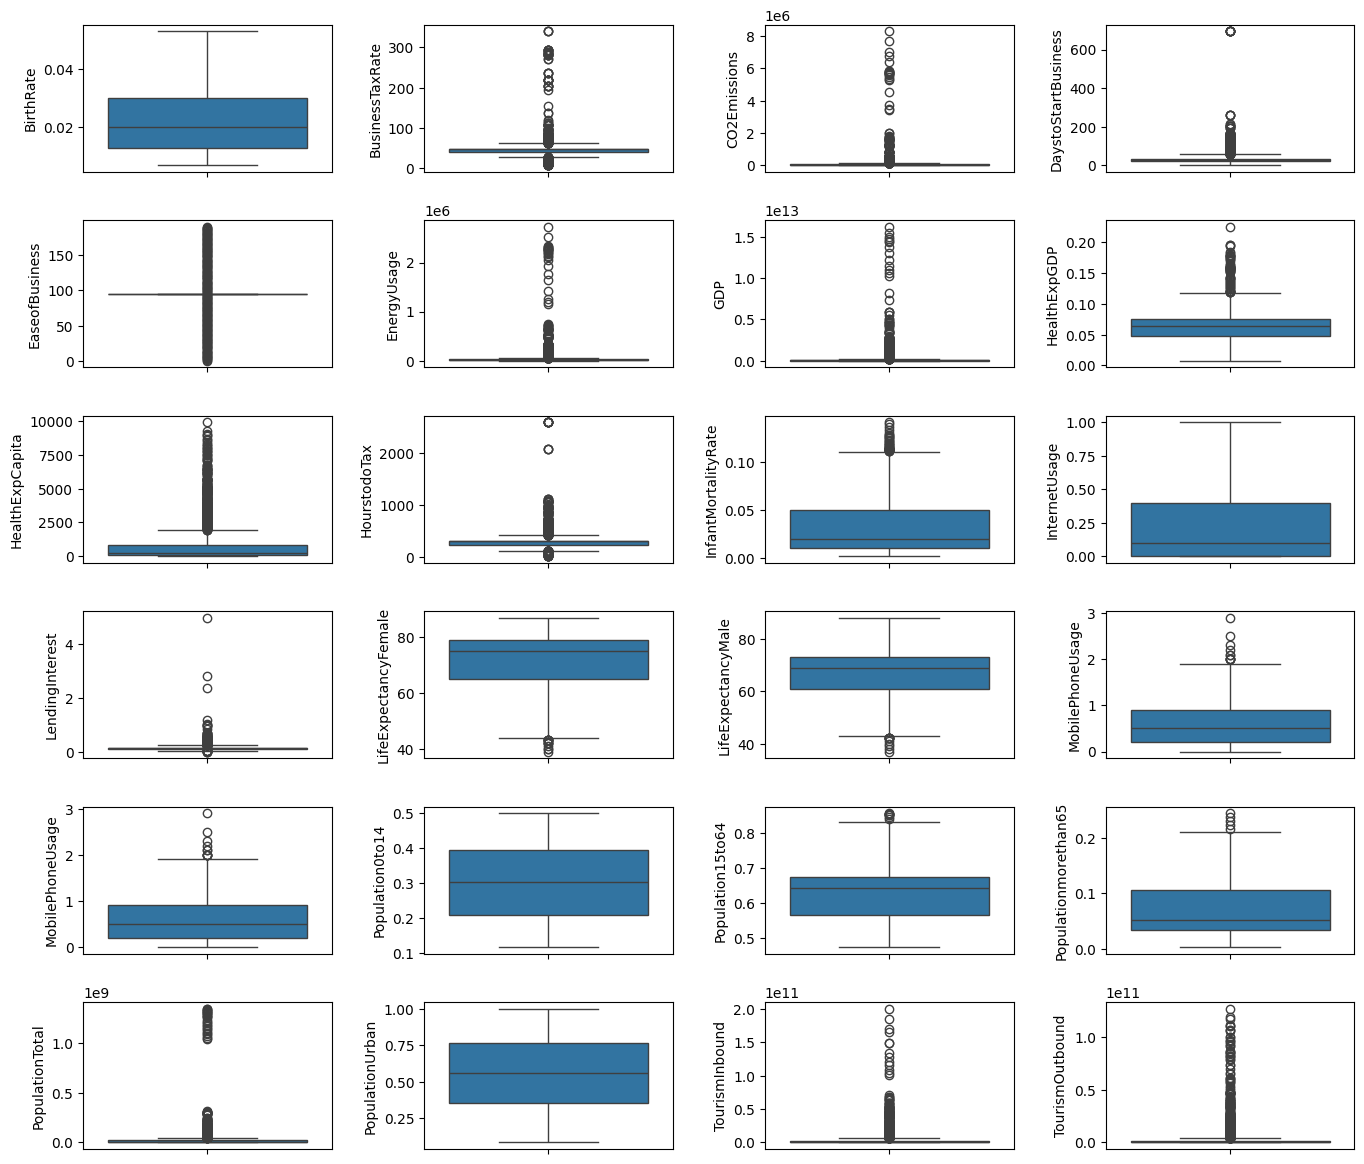

In [167]:
## Check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data1.BirthRate,ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data1.CO2Emissions,ax=axes[0,2])
sns.boxplot(data1.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(data1.EaseofBusiness,ax=axes[1,0])
sns.boxplot(data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(data1.GDP,ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,ax=axes[1,3])
sns.boxplot(data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data1.HourstodoTax,ax=axes[2,1])
sns.boxplot(data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data1.InternetUsage,ax=axes[2,3])
sns.boxplot(data1.LendingInterest,ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(data1.Population0to14,ax=axes[4,1])
sns.boxplot(data1.Population15to64,ax=axes[4,2])
sns.boxplot(data1.Populationmorethan65,ax=axes[4,3])
sns.boxplot(data1.PopulationTotal,ax=axes[5,0])
sns.boxplot(data1.PopulationUrban,ax=axes[5,1])
sns.boxplot(data1.TourismInbound,ax=axes[5,2])
sns.boxplot(data1.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

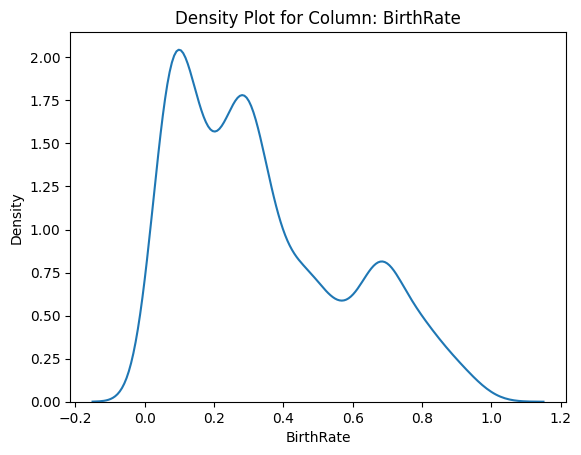

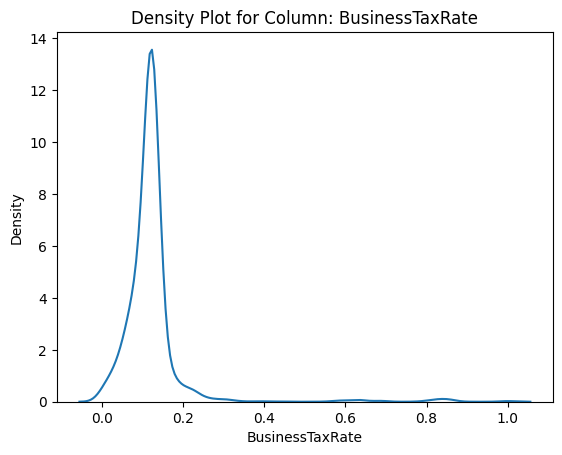

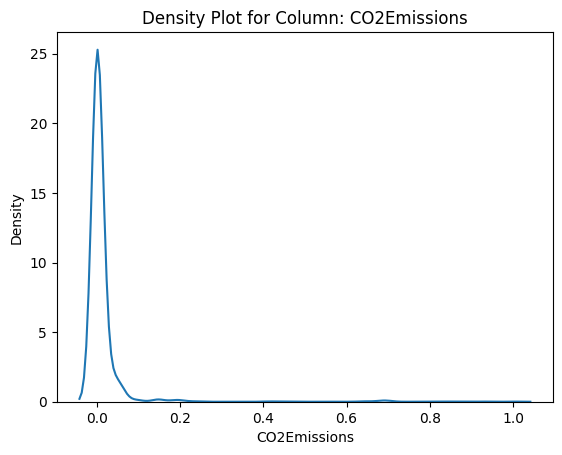

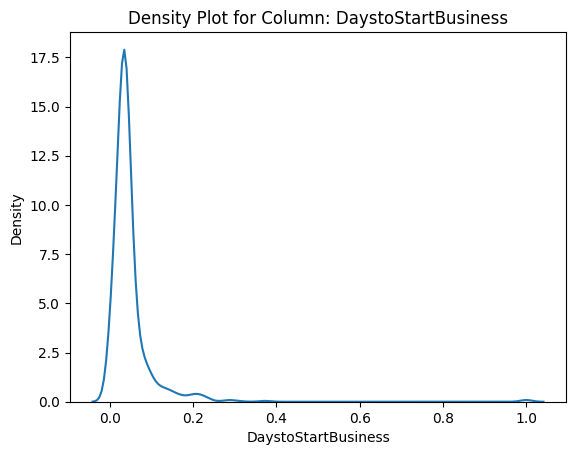

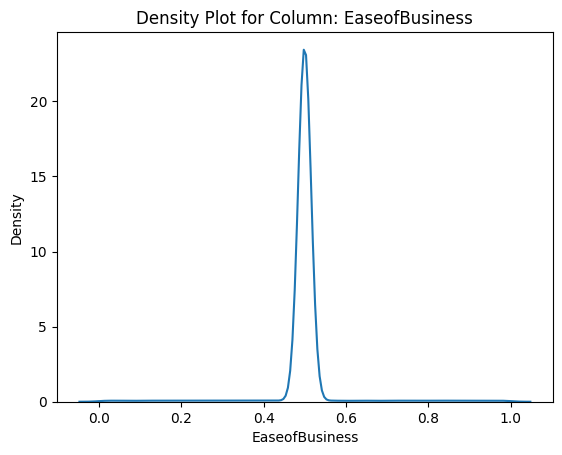

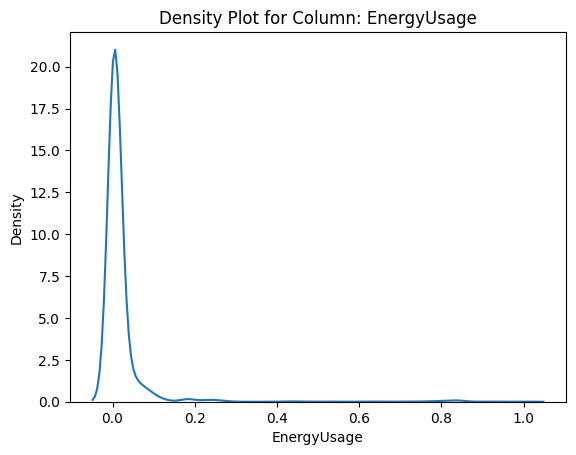

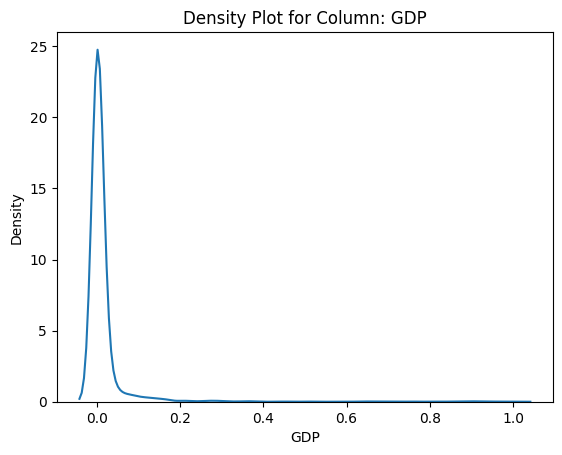

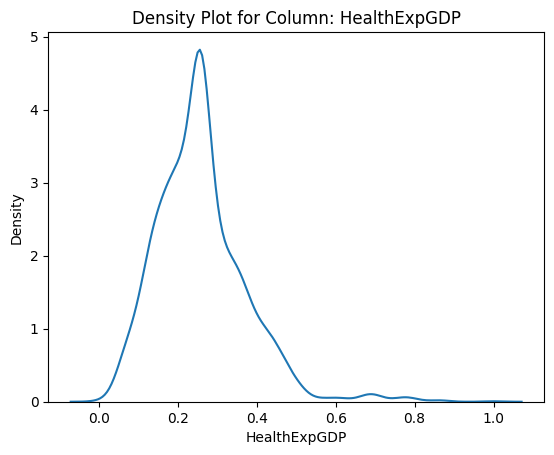

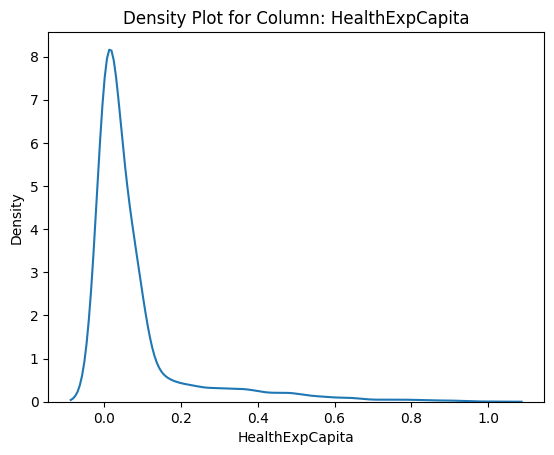

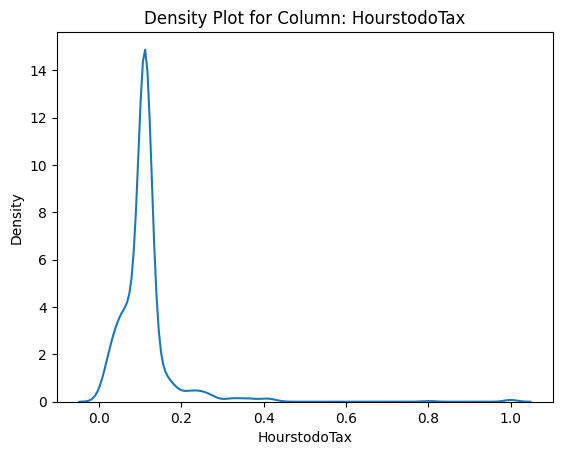

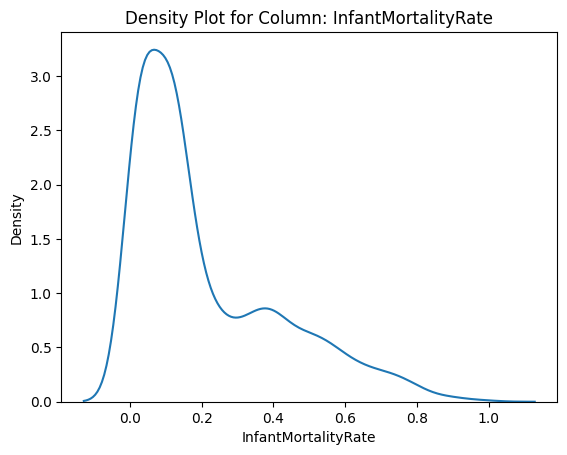

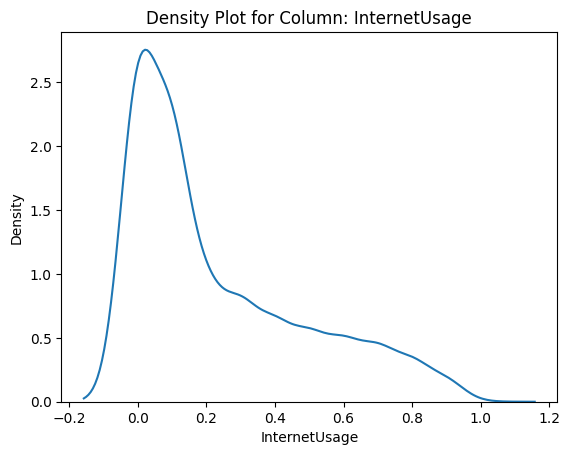

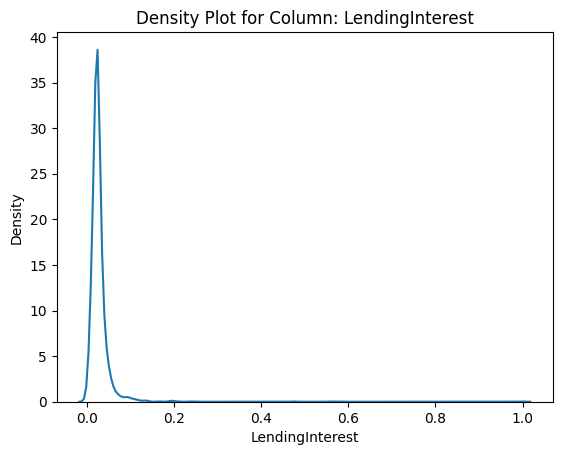

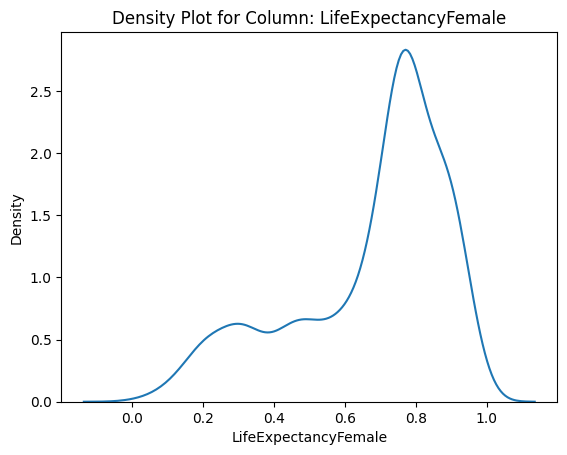

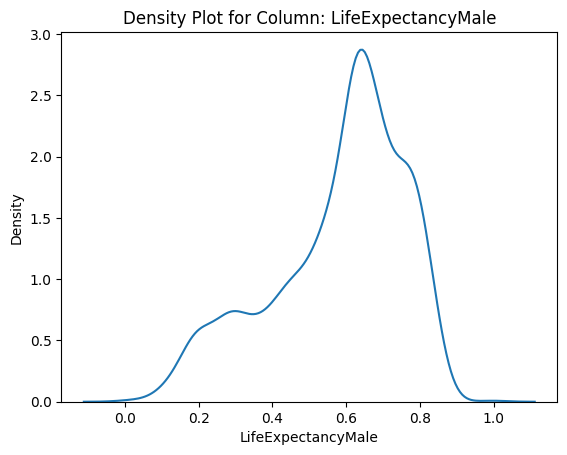

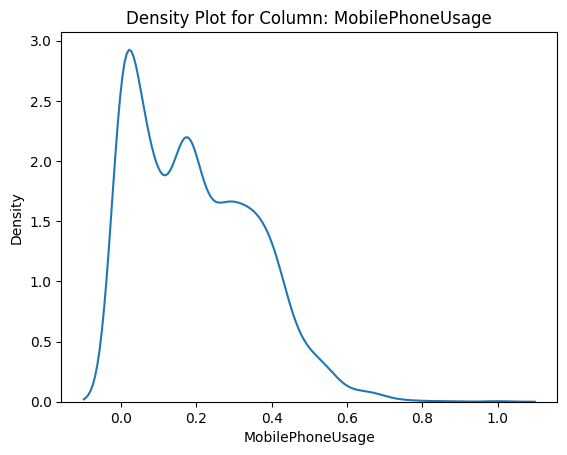

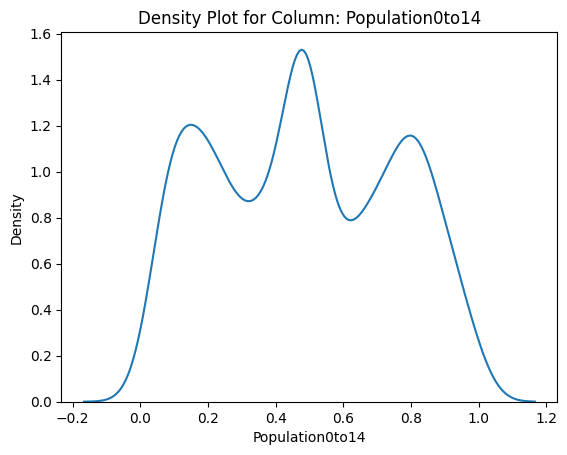

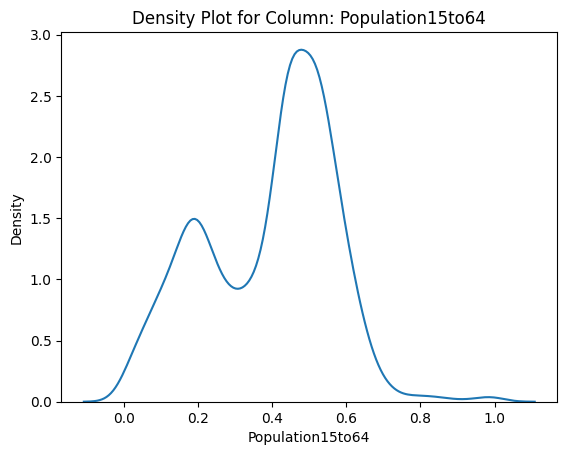

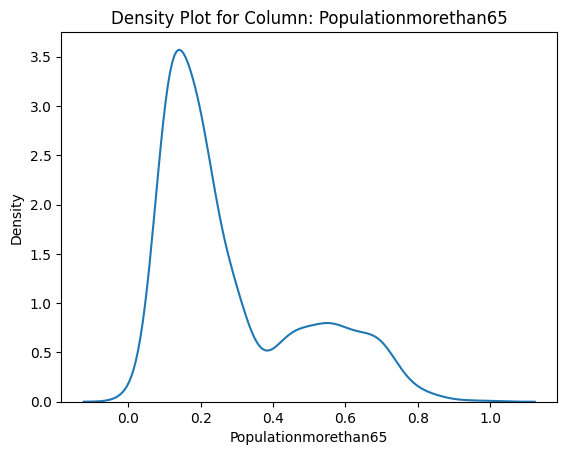

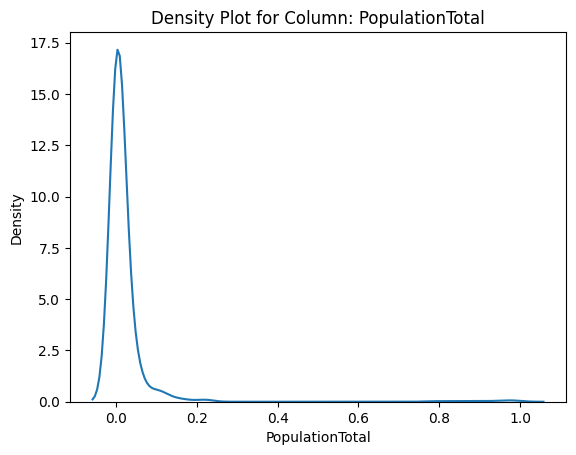

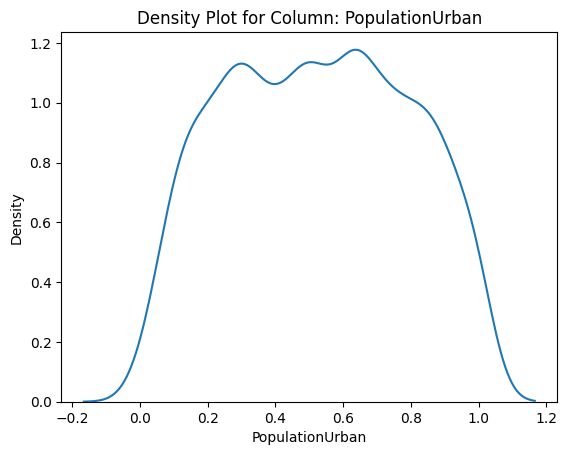

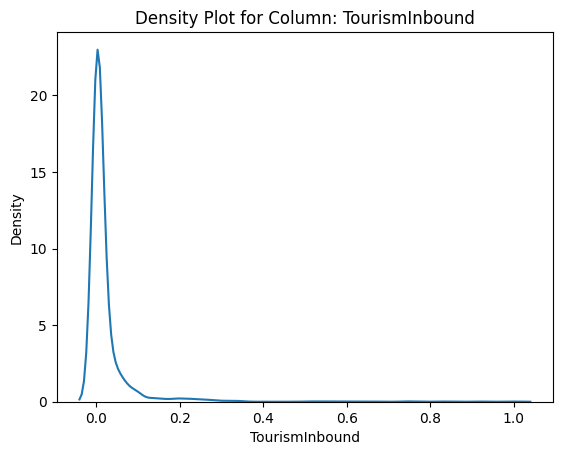

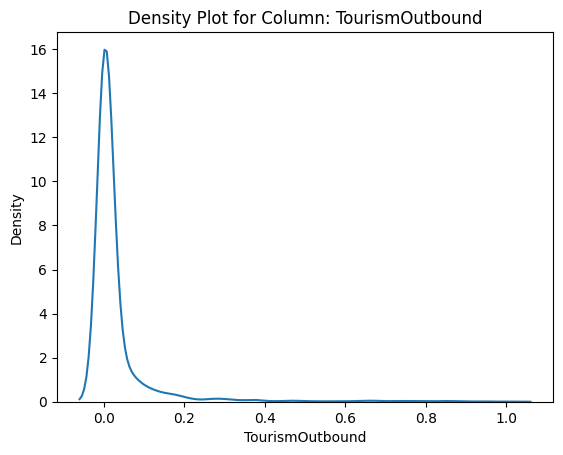

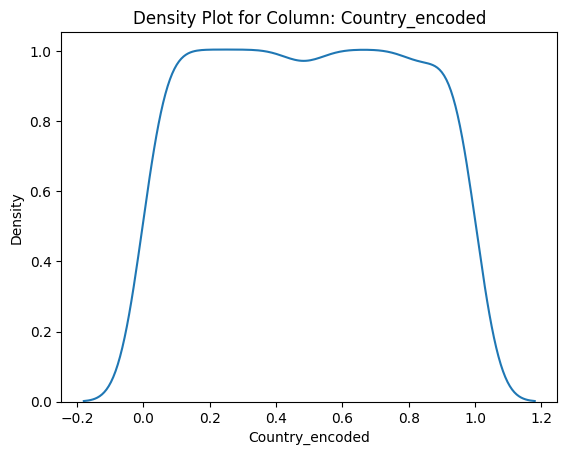

<Figure size 640x480 with 0 Axes>

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data4' is your original DataFrame
# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Transform the data (scaling each column to -1 to 1)
data4_scaled = scaler.fit_transform(data4)

# Convert NumPy array back to DataFrame
data4_scaled_df = pd.DataFrame(data4_scaled, columns=data4.columns)

# Loop through each column in the scaled DataFrame
for col in data4_scaled_df.columns:
    # Create the density plot using the scaled data
    sns.kdeplot(data4_scaled_df[col])
    
    # Optional: Customize the plot
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Density Plot for Column: {col}')
    plt.show()
    plt.clf()  # Clear the current figure to prepare for the next plot


### Conclusion
- <font color=blue> Some columns like "Population Total", "Tourism in bound", "Tourism out bound" has large number of outlier present.
- <font color=blue> columns like "Population Urban", "Population 0 to 14" has less number of outliers.

# <font color='green'>Method 1

### Remove Outliers
here, we are removing outliers using inter quratile range method

In [169]:
## Outlier removal
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [170]:
data1.shape

(1077, 24)

By outlier removal we lost 60% of data.

## <font color='magenta'> Scaling</font>
   &nbsp;   Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>
 
There are two types of scaling
 - Standard Scaling 
 - MinMax Scaling

#### Here we will be using  Standard Scaler

In [171]:
## Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

In [172]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define the list of attributes for clustering
attributes = [
    'BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
    'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP', 'HealthExpCapita',
    'HourstodoTax', 'InfantMortalityRate', 'InternetUsage', 'LendingInterest',
    'LifeExpectancyFemale', 'LifeExpectancyMale', 'MobilePhoneUsage',
    'Population0to14', 'Population15to64', 'Populationmorethan65',
    'PopulationTotal', 'PopulationUrban', 'TourismInbound', 'TourismOutbound'
]

# Select and preprocess the data
data_cleaned = data[attributes].copy()

# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
data_cleaned[attributes] = imputer.fit_transform(data_cleaned[attributes])

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[attributes])

# Perform KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate the mean of each attribute by cluster
cluster_means = data_cleaned.groupby('Cluster')[attributes].mean()

# Count the number of data points in each cluster
cluster_counts = data_cleaned['Cluster'].value_counts().sort_index()

# Prepare the data for the summary DataFrame
summary_data = []

# Populate the summary data list with attribute means and counts by cluster
for attr in attributes:
    row = {
        'Attribute': attr,
        'Overall Mean': data_cleaned[attr].mean(),
        'Cluster 0 Mean': cluster_means.loc[0, attr],
        'Cluster 1 Mean': cluster_means.loc[1, attr],
        'Cluster 2 Mean': cluster_means.loc[2, attr]
    }
    summary_data.append(row)

# Create the DataFrame from the list of dictionaries
summary_df = pd.DataFrame(summary_data)

# Add the count information to the column headers for Cluster 1 Mean and Cluster 2 Mean
summary_df.columns = [
    'Attribute', 'Overall Mean', f'Cluster 0 Mean({cluster_counts[0]}counts)',
    f'Cluster 1 Mean ({cluster_counts[1]} counts)', 
    f'Cluster 2 Mean ({cluster_counts[2]} counts)'
]

summary_df



,Attribute,Overall Mean,Cluster 0 Mean(1571counts),Cluster 1 Mean (62 counts),Cluster 2 Mean (1045 counts)
0,BirthRate,2.263630e-02,1.547868e-02,1.156452e-02,3.405359e-02
1,BusinessTaxRate,4.905166e+01,4.524705e+01,5.193591e+01,5.460019e+01
2,CO2Emissions,1.146823e+05,7.906707e+04,2.397202e+06,3.280215e+04
3,DaystoStartBusiness,3.493764e+01,2.874857e+01,2.120968e+01,4.505646e+01
4,EaseofBusiness,9.486957e+01,9.307810e+01,8.876928e+01,9.792469e+01
5,EnergyUsage,5.643086e+04,4.074639e+04,1.033188e+06,2.205899e+04
6,GDP,2.468437e+11,1.815657e+11,5.534073e+12,3.128732e+10
7,HealthExpGDP,6.416952e-02,6.690189e-02,1.001452e-01,5.792737e-02
8,HealthExpCapita,8.013971e+02,1.153892e+03,3.684919e+03,1.003936e+02
9,HourstodoTax,3.024610e+02,2.974705e+02,2.802964e+02,3.112787e+02


### Apply PCA

In [173]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [174]:
# The amount of variance that each PCA explains is
pc.explained_variance_

array([8.43188132e+00, 2.91901414e+00, 1.77225233e+00, 1.31120414e+00,
       1.21988361e+00, 1.00112758e+00, 9.71660908e-01, 8.18585681e-01,
       7.28332461e-01, 6.57906408e-01, 6.16605368e-01, 5.16209384e-01,
       4.39674970e-01, 3.32837914e-01, 2.93495562e-01, 2.78274502e-01,
       2.20645853e-01, 1.92464326e-01, 1.59857841e-01, 7.44230911e-02,
       4.88806595e-02, 1.61082328e-02, 4.91834788e-05, 1.37554333e-33])

In [175]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.66263143e-01, 1.26795818e-01, 7.69829035e-02, 5.69559424e-02,
       5.29891715e-02, 4.34868708e-02, 4.22069007e-02, 3.55576356e-02,
       3.16372261e-02, 2.85780669e-02, 2.67840368e-02, 2.24230470e-02,
       1.90985534e-02, 1.44577770e-02, 1.27488283e-02, 1.20876575e-02,
       9.58439055e-03, 8.36024443e-03, 6.94388747e-03, 3.23278213e-03,
       2.12327276e-03, 6.99707660e-04, 2.13642660e-06, 5.97507013e-35])

In [176]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.63,  49.31,  57.01,  62.71,  68.01,  72.36,  76.58,  80.14,
        83.3 ,  86.16,  88.84,  91.08,  92.99,  94.44,  95.71,  96.92,
        97.88,  98.72,  99.41,  99.73,  99.94, 100.01, 100.01, 100.01])

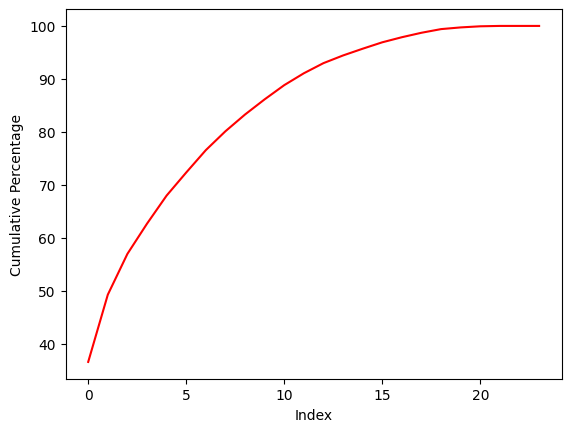

In [177]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers.
here, we are taking 15 columns because they are giving more than 95% data. 

In [178]:
data_pca = pc_components[:,:15]

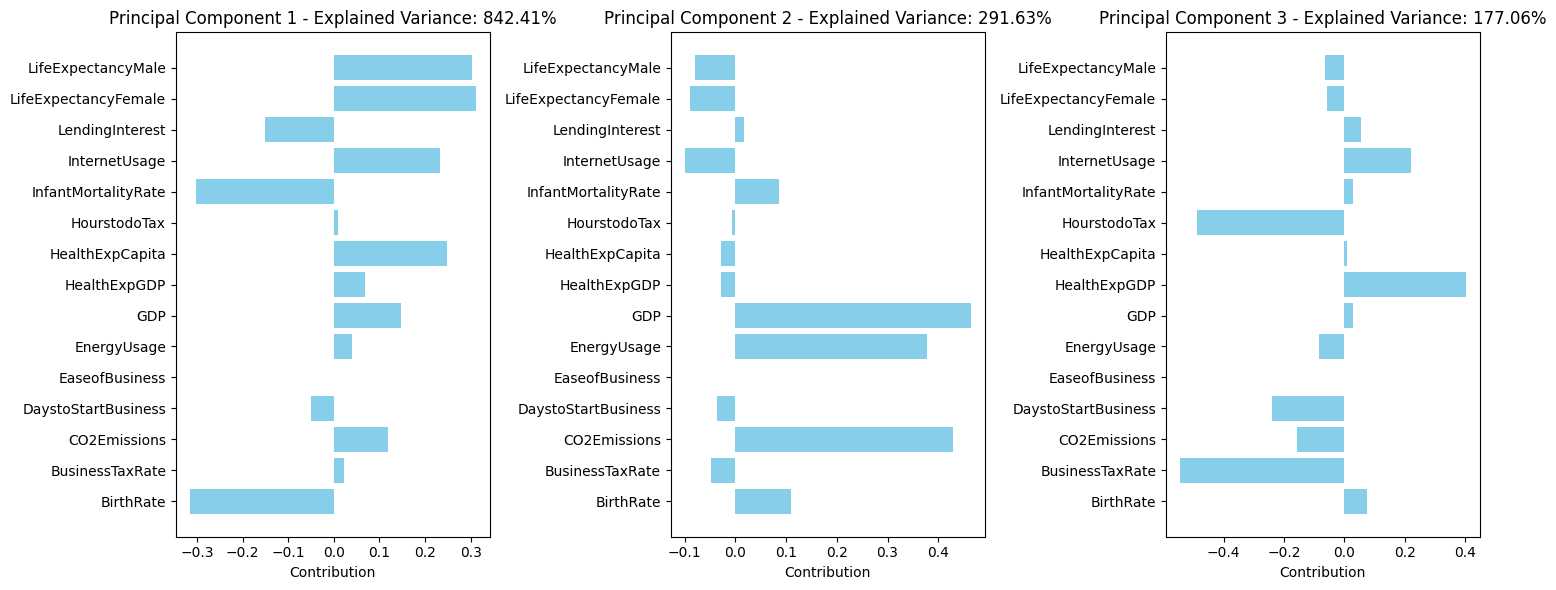

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming pc_components is the PCA-transformed data with 15 components
# Perform PCA transformation
pc = PCA(n_components=15)  # Specify the number of components you want
pc_components = pc.fit_transform(scale_data)

# Extract the first three principal components
pc1 = pc_components[:, 0]
pc2 = pc_components[:, 1]
pc3 = pc_components[:, 2]

# Get the PCA components (loadings)
pca_components = pc.components_[:3].T  # Transpose to align with feature names

# Display feature contributions in the first three principal components
features = ['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
            'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP', 'HealthExpCapita',
            'HourstodoTax', 'InfantMortalityRate', 'InternetUsage', 'LendingInterest',
            'LifeExpectancyFemale', 'LifeExpectancyMale']  # Update with actual feature names

plt.figure(figsize=(15, 6))  # Adjust figure size as needed
for i, (pc, component) in enumerate(zip([pc1, pc2, pc3], pca_components.T), 1):
    # Trim component array to match the number of features
    component_trimmed = component[:len(features)]
    plt.subplot(1, 3, i)
    plt.barh(features, component_trimmed, color='skyblue')
    plt.xlabel('Contribution')
    plt.title(f'Principal Component {i} - Explained Variance: {pc.var()*100:.2f}%')

plt.tight_layout()
plt.show()


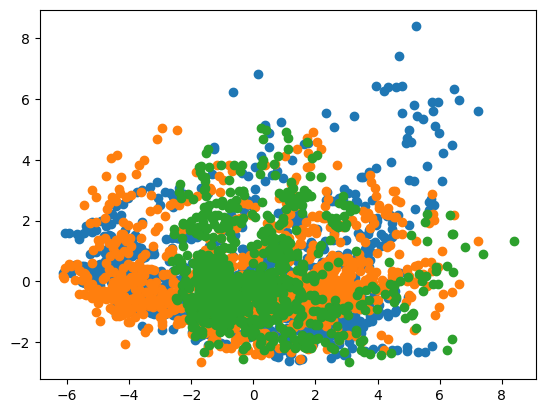

In [180]:
## Plot between PCA's
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]

plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

# <font color='magenta'> Model Building

**There are various types of clustring mostly used are :**
   - k-means clustring
   - Hierarchy clustring
   - DBSCAN clustring

## <font color='purple'> K-means Clustring
#### Using the elbow method to find the optimal number of clusters

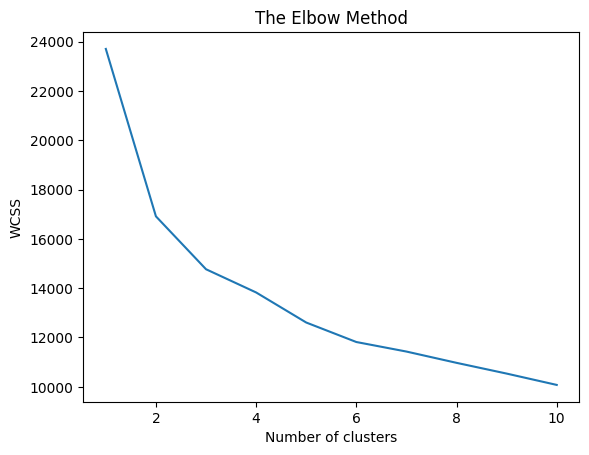

In [181]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see, 
- 3 is the elbow point.
- We have to create three clusters

In [182]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

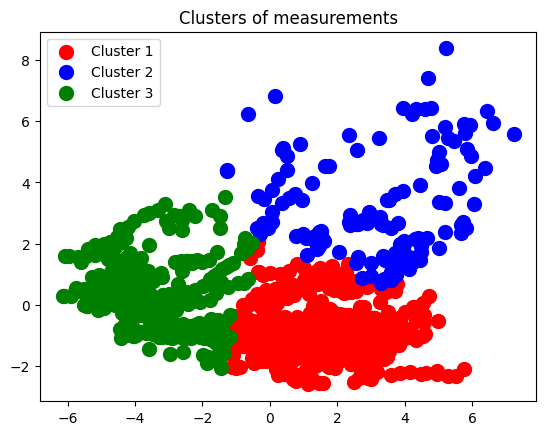

In [183]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [184]:
country_and_encoded_values = {
    'Algeria': 2, 'Angola': 5, 'Benin': 20, 'Botswana': 25, 'Burkina Faso': 29,
    'Burundi': 30, 'Cameroon': 32, 'Central African Republic': 35, 'Chad': 36,
    'Comoros': 40, 'Congo, Dem. Rep.': 41, 'Congo, Rep.': 42, 'Cote d\'Ivoire': 44,
    'Djibouti': 51, 'Egypt, Arab Rep.': 55, 'Equatorial Guinea': 57, 'Eritrea': 58,
    'Ethiopia': 60, 'Gabon': 66, 'Gambia, The': 67, 'Ghana': 70, 'Guinea': 76,
    'Guinea-Bissau': 77, 'Kenya': 96, 'Lesotho': 106, 'Liberia': 107, 'Libya': 108,
    'Madagascar': 114, 'Malawi': 115, 'Mali': 118, 'Mauritania': 121, 'Mauritius': 122,
    'Morocco': 129, 'Mozambique': 130, 'Namibia': 132, 'Niger': 138, 'Nigeria': 139,
    'Rwanda': 154, 'Sao Tome and Principe': 157, 'Senegal': 159, 'Seychelles': 161,
    'Sierra Leone': 162, 'Somalia': 168, 'South Africa': 169, 'South Sudan': 170,
    'Sudan': 177, 'Swaziland': 179, 'Tanzania': 184, 'Togo': 187, 'Tunisia': 190,
    'Uganda': 194, 'Zambia': 206, 'Zimbabwe': 207, 'Afghanistan': 0, 'Armenia': 8,
    'Azerbaijan': 12, 'Bangladesh': 15, 'Bhutan': 22, 'Brunei Darussalam': 27,
    'Cambodia': 31, 'China': 38, 'Georgia': 68, 'Hong Kong SAR, China': 81,
    'India': 84, 'Indonesia': 85, 'Japan': 93, 'Kazakhstan': 95, 'Korea, Dem. Rep.': 98,
    'Korea, Rep.': 99, 'Kyrgyz Republic': 102, 'Lao PDR': 103, 'Macao SAR, China': 112,
    'Malaysia': 116, 'Maldives': 117, 'Mongolia': 127, 'Myanmar': 131, 'Nepal': 133,
    'Pakistan': 142, 'Philippines': 147, 'Singapore': 163, 'Sri Lanka': 172,
    'Tajikistan': 183, 'Thailand': 185, 'Timor-Leste': 186, 'Turkmenistan': 192,
    'Uzbekistan': 200, 'Vietnam': 203, 'Albania': 1, 'Andorra': 4, 'Austria': 11,
    'Belarus': 17, 'Belgium': 18, 'Bosnia and Herzegovina': 24, 'Bulgaria': 28,
    'Croatia': 45, 'Cyprus': 48, 'Czech Republic': 49, 'Denmark': 50, 'Estonia': 59,
    'Faeroe Islands': 61, 'Finland': 63, 'France': 64, 'Germany': 69, 'Greece': 71,
    'Hungary': 82, 'Iceland': 83, 'Ireland': 88, 'Isle of Man': 89, 'Italy': 91,
    'Kosovo': 100, 'Latvia': 104, 'Liechtenstein': 109, 'Lithuania': 110,
    'Luxembourg': 111, 'Macedonia, FYR': 113, 'Malta': 119, 'Moldova': 125,
    'Monaco': 126, 'Montenegro': 128, 'Netherlands': 134, 'Norway': 140, 'Poland': 148,
    'Portugal': 149, 'Romania': 152, 'Russian Federation': 153, 'San Marino': 156,
    'Serbia': 160, 'Slovak Republic': 165, 'Slovenia': 166, 'Spain': 171, 'Sweden': 180,
    'Switzerland': 181, 'Turkey': 191, 'Ukraine': 195, 'United Kingdom': 197,
    'Bahrain': 14, 'Iran, Islamic Rep.': 86, 'Iraq': 87, 'Israel': 90, 'Jordan': 94,
    'Kuwait': 101, 'Lebanon': 105, 'Oman': 141, 'Qatar': 151, 'Saudi Arabia': 158,
    'Syrian Arab Republic': 182, 'United Arab Emirates': 196, 'Yemen, Rep.': 205,
    'American Samoa': 3, 'Australia': 10, 'Fiji': 62, 'French Polynesia': 65,
    'Guam': 74, 'Kiribati': 97, 'Marshall Islands': 120, 'Micronesia, Fed. Sts.': 124,
    'New Caledonia': 135, 'New Zealand': 136, 'Papua New Guinea': 144, 'Samoa': 155,
    'Solomon Islands': 167, 'Tonga': 188, 'Vanuatu': 201, 'Antigua and Barbuda': 6,
    'Argentina': 7, 'Aruba': 9, 'Bahamas, The': 13, 'Barbados': 16, 'Belize': 19,
    'Bermuda': 21, 'Bolivia': 23, 'Brazil': 26, 'Canada': 33, 'Cayman Islands': 34,
    'Chile': 37, 'Colombia': 39, 'Costa Rica': 43, 'Cuba': 46, 'Curacao': 47,
    'Dominica': 52, 'Dominican Republic': 53, 'Ecuador': 54, 'El Salvador': 56,
    'Greenland': 72, 'Grenada': 73, 'Guatemala': 75, 'Guyana': 78, 'Haiti': 79,
    'Honduras': 80, 'Jamaica': 92, 'Mexico': 123, 'Nicaragua': 137, 'Panama': 143,
    'Paraguay': 145, 'Peru': 146, 'Puerto Rico': 150, 'Sint Maarten (Dutch part)': 164,
    'St. Kitts and Nevis': 173, 'St. Lucia': 174, 'St. Martin (French part)': 175,
    'St. Vincent and the Grenadines': 176, 'Suriname': 178, 'Trinidad and Tobago': 189,
    'Turks and Caicos Islands': 193, 'United States': 198, 'Uruguay': 199,
    'Venezuela, RB': 202, 'Virgin Islands (U.S.)': 204
}

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'data_pca' is your PCA-transformed data and 'country_and_encoded_values' is your dictionary
# Extract country names and their encoded values
country_names = list(country_and_encoded_values.keys())
encoded_values = list(country_and_encoded_values.values())

# Perform k-means clustering on 'data_pca'
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_pca)

# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(y_kmeans)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)


                      Country  Encoded_Value  Cluster
0                     Algeria              2        1
1                      Angola              5        2
2                       Benin             20        2
3                    Botswana             25        2
4                Burkina Faso             29        2
..                        ...            ...      ...
203  Turks and Caicos Islands            193        2
204             United States            198        0
205                   Uruguay            199        0
206             Venezuela, RB            202        0
207     Virgin Islands (U.S.)            204        0

[208 rows x 3 columns]


We get the three clusters of measurments.

In [186]:
## Accuracy check
from sklearn.metrics import silhouette_score
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('Silhouette Score for K-means clustring :', s1_kmeans)
inertia_value = kmeans.inertia_
print('Inertia for K-means clustering:', inertia_value)

Silhouette Score for K-means clustring : 0.2602650921195987
Inertia for K-means clustering: 14767.87853644262


In [187]:
from sklearn.metrics import pairwise_distances
k_values = [ 3]
accuracy_results = []

for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca)
    cluster_centers = kmeans.cluster_centers_
    
    # Check cluster_centers array shape and contents
    print(f"Cluster centers for k={k}:")
    print(cluster_centers)
    print(f"Shape: {cluster_centers.shape}")
    
    # Calculate pairwise distances from each point to its cluster centroid
    distances = pairwise_distances(data_pca, cluster_centers, metric='euclidean')
    
    cluster_accuracy = []
    
    # Calculate accuracy for each cluster
    for cluster_idx in range(k):
        # Get distances for current cluster
        cluster_distances = distances[:, cluster_idx]
        
        # Sort distances and get indices
        sorted_indices = np.argsort(cluster_distances)
        
        # Number of points in the current cluster
        num_points_in_cluster = np.sum(cluster_labels == cluster_idx)
        
        # Select top num_points_in_cluster distances
        nearest_distances_indices = sorted_indices[:num_points_in_cluster]
        
        # Count correct labels (same as cluster label)
        correct_labels_count = np.sum(cluster_labels[nearest_distances_indices] == cluster_idx)
        
        # Calculate accuracy for the current cluster
        cluster_accuracy.append(correct_labels_count / num_points_in_cluster)
    
    # Calculate overall accuracy (mean of cluster accuracies)
    overall_accuracy_M1_kmeans = np.mean(cluster_accuracy)
    accuracy_results.append(overall_accuracy_M1_kmeans)
    print("Accuracy Results:",overall_accuracy_M1_kmeans)


Cluster centers for k=3:
[[ 1.52111809 -0.94058248 -0.01109974  0.07381263  0.08029309 -0.01134038
  -0.12971724 -0.03718715  0.04605738  0.05030428 -0.02621009 -0.01560263
   0.05164384  0.0632901   0.02253025]
 [ 3.10422735  3.29243469 -0.24790425 -0.09840696  0.05275785  0.23671346
   0.09569613  0.083427    0.04957802 -0.13046173 -0.07157607 -0.0145892
  -0.17037019 -0.13747542 -0.13220722]
 [-3.40525966  0.30794189  0.10254251 -0.07934212 -0.1414278  -0.0642424
   0.16607726  0.0282977  -0.08778743 -0.03220614  0.06491419  0.02897839
  -0.02049682 -0.04971709  0.01102237]]
Shape: (3, 15)
Accuracy Results: 0.7588868614359923


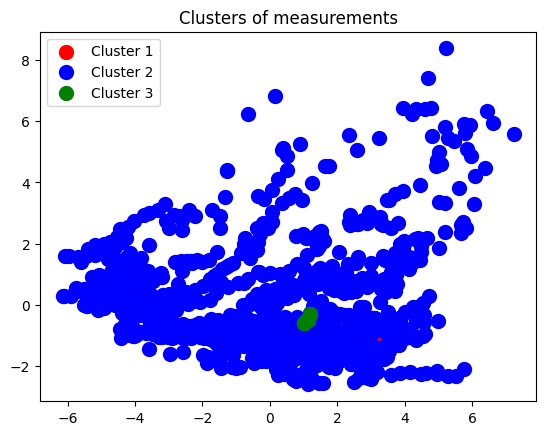

Silhouette Score for Spectral clustering: -0.1498175930832372
Accuracy Results for Spectral Clustering: 0.4114512471655329


In [188]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(data_pca)

plt.scatter(data_pca[y_spectral == 0, 0], data_pca[y_spectral == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[y_spectral == 1, 0], data_pca[y_spectral == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[y_spectral == 2, 0], data_pca[y_spectral == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

s1_spectral = silhouette_score(data_pca, y_spectral)
print('Silhouette Score for Spectral clustering:', s1_spectral)

# Checking accuracy for Spectral Clustering
k = 3
spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(data_pca)

distances_spectral = pairwise_distances(data_pca, cluster_centers, metric='euclidean')
cluster_accuracy_spectral = []

for cluster_idx in range(k):
    cluster_distances_spectral = distances_spectral[:, cluster_idx]
    sorted_indices_spectral = np.argsort(cluster_distances_spectral)
    num_points_in_cluster_spectral = np.sum(cluster_labels_spectral == cluster_idx)
    nearest_distances_indices_spectral = sorted_indices_spectral[:num_points_in_cluster_spectral]
    correct_labels_count_spectral = np.sum(cluster_labels_spectral[nearest_distances_indices_spectral] == cluster_idx)
    cluster_accuracy_spectral.append(correct_labels_count_spectral / num_points_in_cluster_spectral)

overall_accuracy_M1_spectral = np.mean(cluster_accuracy_spectral)
print("Accuracy Results for Spectral Clustering:", overall_accuracy_M1_spectral)


## <font color='purple'> Hierarchy Clustring

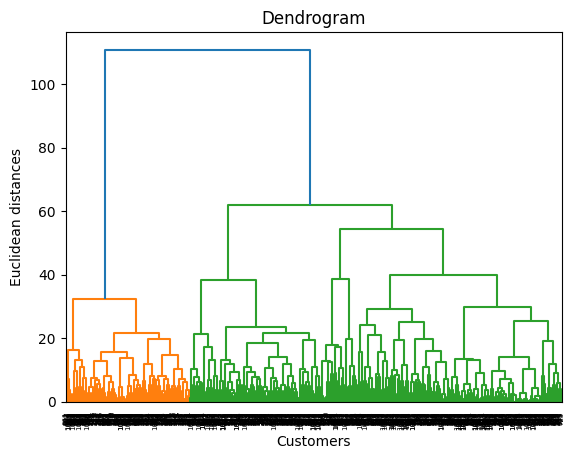

In [189]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [190]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Compute the hierarchical clustering
Z = linkage(data_pca, method='ward')

# Determine cluster labels
n_clusters = 4
y_hc = fcluster(Z, n_clusters, criterion='maxclust')

print("Cluster labels:", y_hc)


Cluster labels: [3 1 1 ... 4 4 4]


Unique cluster labels: [1 2 3 4]


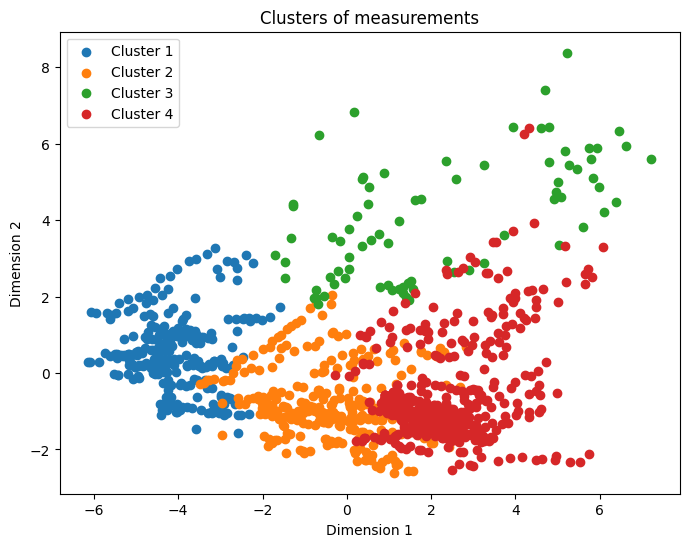

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Check unique cluster labels
unique_labels = np.unique(y_hc)
print("Unique cluster labels:", unique_labels)

# Plot clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    plt.scatter(data_pca[y_hc == label, 0], data_pca[y_hc == label, 1], label=f'Cluster {label}')

plt.title('Clusters of measurements')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [192]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(y_hc)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)

                      Country  Encoded_Value  Cluster
0                     Algeria              2        3
1                      Angola              5        1
2                       Benin             20        1
3                    Botswana             25        1
4                Burkina Faso             29        1
..                        ...            ...      ...
203  Turks and Caicos Islands            193        1
204             United States            198        4
205                   Uruguay            199        2
206             Venezuela, RB            202        4
207     Virgin Islands (U.S.)            204        4

[208 rows x 3 columns]


In [193]:
## Accuracy check
s1_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s1_hierarchy)


Silhouette Score for Hierarchy clustring : 0.16935978083661402


In [194]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np

# Perform Hierarchical Clustering
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters)
hc_labels = hc.fit_predict(data_pca)

# Calculate cluster centers
cluster_centers = np.array([data_pca[hc_labels == i].mean(axis=0) for i in range(n_clusters)])

# Check cluster_centers array shape and contents
print(f"Cluster centers for n_clusters={n_clusters}:")
print(cluster_centers)
print(f"Shape: {cluster_centers.shape}")

# Calculate pairwise distances from each point to its cluster centroid
distances = pairwise_distances(data_pca, cluster_centers, metric='euclidean')

cluster_accuracy = []

# Calculate accuracy for each cluster
for cluster_idx in range(n_clusters):
    # Get distances for current cluster
    cluster_distances = distances[:, cluster_idx]
    
    # Sort distances and get indices
    sorted_indices = np.argsort(cluster_distances)
    
    # Number of points in the current cluster
    num_points_in_cluster = np.sum(hc_labels == cluster_idx)
    
    # Select top num_points_in_cluster distances
    nearest_distances_indices = sorted_indices[:num_points_in_cluster]
    
    # Count correct labels (same as cluster label)
    correct_labels_count = np.sum(hc_labels[nearest_distances_indices] == cluster_idx)
    
    # Calculate accuracy for the current cluster
    cluster_accuracy.append(correct_labels_count / num_points_in_cluster)

# Calculate overall accuracy (mean of cluster accuracies)
overall_accuracy_M1_hierarchial = np.mean(cluster_accuracy)
print(f"Accuracy for Hierarchical Clustering with n_clusters={n_clusters}: {overall_accuracy_M1_hierarchial:.2f}")


Cluster centers for n_clusters=4:
[[ 2.35534751e+00 -5.18304442e-01 -1.05776056e-01 -2.63877378e-01
  -1.80533735e-01 -8.67268613e-03  6.95790493e-02 -1.21368323e-03
   9.01233823e-02  7.13630093e-02  1.47543670e-02  8.11553503e-02
   8.17241312e-02  7.74121399e-02 -4.94223089e-03]
 [ 2.15612503e+00  4.02780399e+00 -6.21926988e-01  1.85552849e-01
   2.04599893e-01  3.62588765e-01 -4.85936904e-01  2.78488939e-01
   2.37249520e-01  2.88533108e-02  2.34182692e-01 -1.58222540e-01
   5.59504173e-02 -1.10989812e-01 -1.96902316e-01]
 [-4.54987865e-01 -8.00673639e-01  5.04079739e-02  7.03916682e-01
   6.36105517e-01  5.15689224e-02 -1.01083482e-01 -1.40751908e-01
  -3.72828580e-02  8.31725373e-02 -9.09938227e-02 -1.64404169e-01
  -2.82675224e-01 -1.02973719e-01  7.00607792e-02]
 [-4.02552451e+00  5.16007298e-01  3.02892357e-01 -3.60775767e-01
  -4.32075482e-01 -1.46071903e-01  1.34087505e-01  6.85621885e-02
  -1.78404304e-01 -2.13279956e-01  2.92916318e-03  8.57681080e-02
   1.46570987e-01  1.

## <font color='purple'> DBSCAN

In [195]:
from sklearn.cluster import DBSCAN

eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

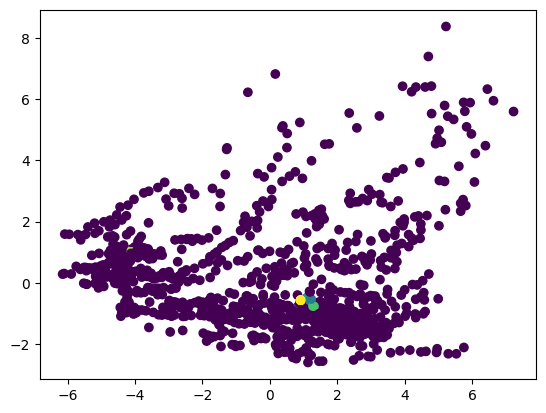

In [196]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [197]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(dbscan_labels)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)

                      Country  Encoded_Value  Cluster
0                     Algeria              2       -1
1                      Angola              5       -1
2                       Benin             20       -1
3                    Botswana             25       -1
4                Burkina Faso             29       -1
..                        ...            ...      ...
203  Turks and Caicos Islands            193       -1
204             United States            198        1
205                   Uruguay            199       -1
206             Venezuela, RB            202       -1
207     Virgin Islands (U.S.)            204       -1

[208 rows x 3 columns]


In [198]:
data1['cluster']=dbscan.labels_
data1.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.063,7.0,302.461048,...,0.0,0.490,0.481,0.029,6674286,0.082,1400000.0,14000000.0,30.0,-1


In [199]:
# Perform DBSCAN clustering
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_pca)

# Extract unique cluster labels (excluding noise)

# Calculate cluster centers
cluster_centers = np.array([data_pca[dbscan_labels == cluster].mean(axis=0) for cluster in dbscan_labels])

# Check cluster_centers array shape and contents
print(f"Cluster centers for DBSCAN (excluding noise):")
print(cluster_centers)
print(f"Shape: {cluster_centers.shape}")

# Calculate pairwise distances from each point to its cluster centroid
distances = pairwise_distances(data_pca, cluster_centers, metric='euclidean')

cluster_accuracy = []

# Calculate accuracy for each cluster
for cluster_idx, cluster_label in enumerate(dbscan_labels):
    # Get distances for current cluster
    cluster_distances = distances[:, cluster_idx]
    
    # Sort distances and get indices
    sorted_indices = np.argsort(cluster_distances)
    
    # Number of points in the current cluster
    num_points_in_cluster = np.sum(dbscan_labels == cluster_label)
    
    # Select top num_points_in_cluster distances
    nearest_distances_indices = sorted_indices[:num_points_in_cluster]
    
    # Count correct labels (same as cluster label)
    correct_labels_count = np.sum(dbscan_labels[nearest_distances_indices] == cluster_label)
    
    # Calculate accuracy for the current cluster
    cluster_accuracy.append(correct_labels_count / num_points_in_cluster)

# Calculate overall accuracy (mean of cluster accuracies)
overall_accuracy_M1_DBSCAN = np.mean(cluster_accuracy)
print(f"Accuracy for DBSCAN with eps={eps}, min_samples={min_samples}: {overall_accuracy_M1_DBSCAN:.2f}")


Cluster centers for DBSCAN (excluding noise):
[[-0.01937728  0.0197839   0.0291261  ... -0.00636449 -0.01038003
  -0.00230718]
 [-0.01937728  0.0197839   0.0291261  ... -0.00636449 -0.01038003
  -0.00230718]
 [-0.01937728  0.0197839   0.0291261  ... -0.00636449 -0.01038003
  -0.00230718]
 ...
 [ 1.18651467 -0.60141414 -0.81184463 ...  0.71316891  0.43383353
   0.20985953]
 [-0.01937728  0.0197839   0.0291261  ... -0.00636449 -0.01038003
  -0.00230718]
 [-0.01937728  0.0197839   0.0291261  ... -0.00636449 -0.01038003
  -0.00230718]]
Shape: (1077, 15)
Accuracy for DBSCAN with eps=0.2, min_samples=5: 0.96


In [200]:
# Use pandas filtering and get noisy datapoints -1
data1[data1['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342000,0.619,0.039,31719449,0.599,1.020000e+08,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454000,0.517,0.029,6949366,0.383,7.700000e+07,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383000,0.587,0.029,1755375,0.532,2.270000e+08,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468000,0.505,0.028,11607944,0.178,2.300000e+07,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.06300,7.000000,302.461048,...,0.0,0.490000,0.481,0.029,6674286,0.082,1.400000e+06,14000000.0,30.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,0.010,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.08600,558.000000,302.461048,...,0.1,0.166000,0.704,0.130,11270957,0.768,2.614000e+09,456000000.0,46.0,-1
2674,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,801.397077,302.461048,...,1.3,0.195000,0.668,0.137,152056,0.897,6.760000e+08,357000000.0,47.0,-1
2679,0.014,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,801.397077,302.461048,...,1.0,0.303062,0.642,0.052,56810,0.852,6.885000e+08,456000000.0,72.0,-1
2699,0.020,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,801.397077,302.461048,...,0.5,0.303062,0.642,0.052,32427,0.911,6.885000e+08,456000000.0,193.0,-1


In [201]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s1_dbscan)


Silhouette Score for DBSCAN is: -0.31725128843132505


<font color=blue>DBSCAN is not most effective on this dataset

We get clustrers but, we used outlier removal data. Problem with that data is we have only 40% data left after removing outliers. Which means we loss more than 50% information from out dataset. So, we have to keep outliers. Now, create clusters with this data.

# <font color='green'> Method 2
**With ouliers**

In [202]:
## Standardization of data
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)

### Apply PCA

In [203]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [204]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.60165806e-01, 1.64402764e-01, 6.82797124e-02, 5.38134025e-02,
       4.53838037e-02, 3.99703114e-02, 3.76134449e-02, 3.32446967e-02,
       3.23893877e-02, 3.10115107e-02, 2.79677096e-02, 2.25189821e-02,
       1.86833565e-02, 1.79800123e-02, 1.23756481e-02, 1.00626397e-02,
       6.57311785e-03, 5.21775416e-03, 4.46422250e-03, 3.49432571e-03,
       2.14036857e-03, 1.60070109e-03, 6.44790890e-04, 1.53054249e-06])

In [205]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.02,  52.46,  59.29,  64.67,  69.21,  73.21,  76.97,  80.29,
        83.53,  86.63,  89.43,  91.68,  93.55,  95.35,  96.59,  97.6 ,
        98.26,  98.78,  99.23,  99.58,  99.79,  99.95, 100.01, 100.01])

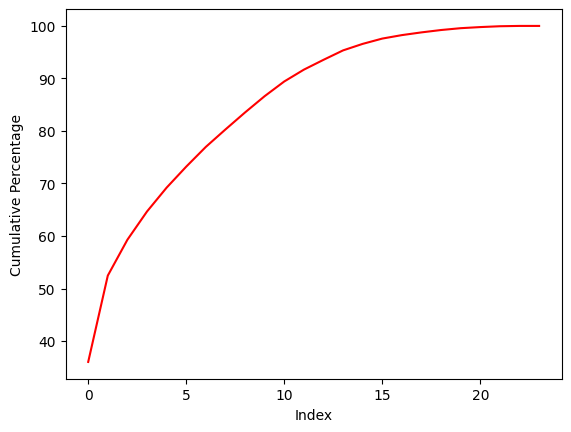

In [206]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers.
here, we are taking 15 columns because they are giving more than 95% data. 

In [207]:
data_pca2 = pc_components[:,:15]

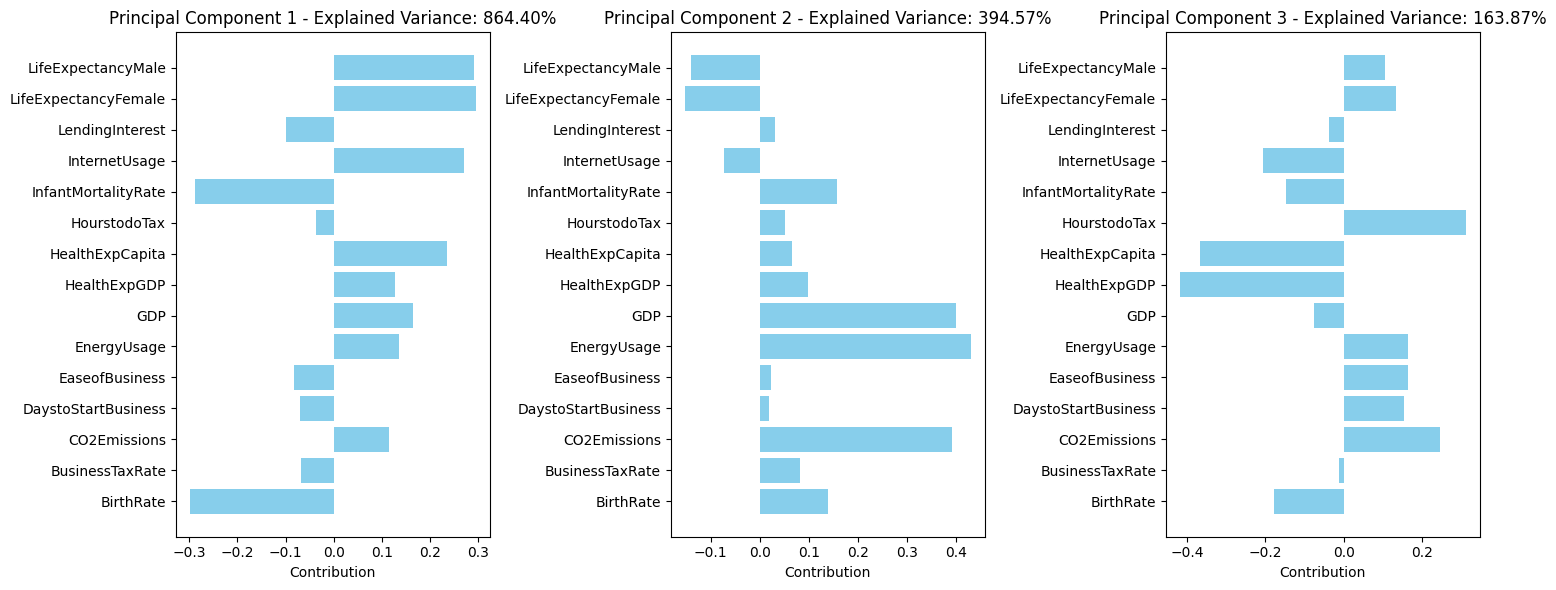

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming pc_components is the PCA-transformed data with 15 components
# Perform PCA transformation
pc = PCA(n_components=15)  # Specify the number of components you want
pc_components = pc.fit_transform(scale_data)

# Extract the first three principal components
pc1 = pc_components[:, 0]
pc2 = pc_components[:, 1]
pc3 = pc_components[:, 2]

# Get the PCA components (loadings)
pca_components = pc.components_[:3].T  # Transpose to align with feature names

# Display feature contributions in the first three principal components
features = ['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
            'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP', 'HealthExpCapita',
            'HourstodoTax', 'InfantMortalityRate', 'InternetUsage', 'LendingInterest',
            'LifeExpectancyFemale', 'LifeExpectancyMale']  # Update with actual feature names

plt.figure(figsize=(15, 6))  # Adjust figure size as needed
for i, (pc, component) in enumerate(zip([pc1, pc2, pc3], pca_components.T), 1):
    # Trim component array to match the number of features
    component_trimmed = component[:len(features)]
    plt.subplot(1, 3, i)
    plt.barh(features, component_trimmed, color='skyblue')
    plt.xlabel('Contribution')
    plt.title(f'Principal Component {i} - Explained Variance: {pc.var()*100:.2f}%')

plt.tight_layout()
plt.show()


## <font color='purple'> K-means Clustring
#### Using the elbow method to find the optimal number of clusters

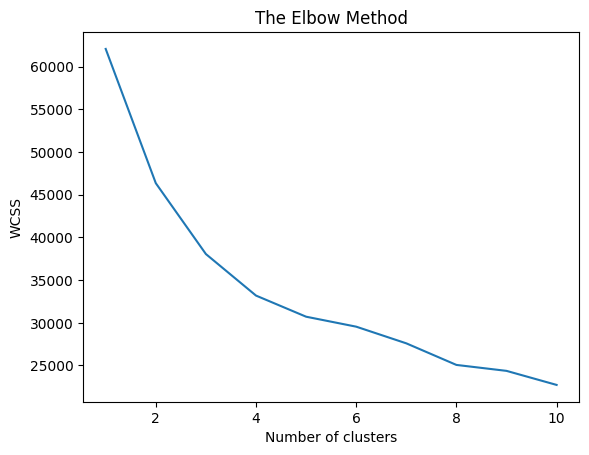

In [209]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see, 
- 3 is the elbow point.
- We have to create three clusters

In [210]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca2)

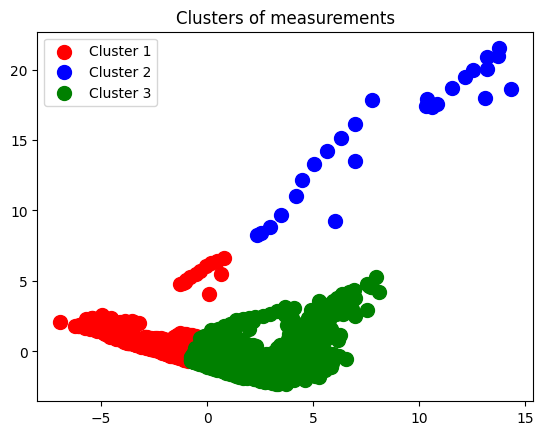

In [211]:
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(y_kmeans)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)


                      Country  Encoded_Value  Cluster
0                     Algeria              2        0
1                      Angola              5        0
2                       Benin             20        0
3                    Botswana             25        0
4                Burkina Faso             29        0
..                        ...            ...      ...
203  Turks and Caicos Islands            193        2
204             United States            198        2
205                   Uruguay            199        2
206             Venezuela, RB            202        0
207     Virgin Islands (U.S.)            204        0

[208 rows x 3 columns]


In [213]:
## Accuracy Check
s2_kmeans = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)


Silhouette Score for K-means clustring : 0.30015673593939796


In [214]:
from sklearn.metrics import pairwise_distances
k_values = [ 3]
accuracy_results = []

for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca2)
    cluster_centers = kmeans.cluster_centers_
    
    # Check cluster_centers array shape and contents
    print(f"Cluster centers for k={k}:")
    print(cluster_centers)
    print(f"Shape: {cluster_centers.shape}")
    
    # Calculate pairwise distances from each point to its cluster centroid
    distances = pairwise_distances(data_pca2, cluster_centers, metric='euclidean')
    
    cluster_accuracy = []
    
    # Calculate accuracy for each cluster
    for cluster_idx in range(k):
        # Get distances for current cluster
        cluster_distances = distances[:, cluster_idx]
        
        # Sort distances and get indices
        sorted_indices = np.argsort(cluster_distances)
        
        # Number of points in the current cluster
        num_points_in_cluster = np.sum(cluster_labels == cluster_idx)
        
        # Select top num_points_in_cluster distances
        nearest_distances_indices = sorted_indices[:num_points_in_cluster]
        
        # Count correct labels (same as cluster label)
        correct_labels_count = np.sum(cluster_labels[nearest_distances_indices] == cluster_idx)
        
        # Calculate accuracy for the current cluster
        cluster_accuracy.append(correct_labels_count / num_points_in_cluster)
    
    # Calculate overall accuracy (mean of cluster accuracies)
    overall_accuracy_M2_kmeans = np.mean(cluster_accuracy)
    accuracy_results.append(overall_accuracy_M2_kmeans)
    print("Accuracy Results:",overall_accuracy_M2_kmeans)


Cluster centers for k=3:
[[-2.90080797e+00  6.83634357e-01 -2.47404487e-01 -7.42437094e-02
  -1.57917631e-02 -5.41222247e-02  7.49178621e-02  4.90431934e-03
  -2.36487313e-02 -2.12926746e-02 -2.65277631e-02  5.72994889e-03
   7.79702430e-02  5.87099426e-02  2.74456003e-02]
 [ 8.63502493e+00  1.56203345e+01  2.81499764e+00 -1.13038018e+00
  -4.96443037e-01  2.15271015e-01 -9.38708611e-03  5.91444053e-01
   2.57342561e-01 -8.09619550e-02 -9.22733745e-02 -6.85168421e-01
  -1.95082034e-01 -7.66001934e-01 -9.16845891e-01]
 [ 1.78747332e+00 -7.09414614e-01  1.18525683e-01  6.78053815e-02
   1.86007508e-02  3.24660324e-02 -4.96509427e-02 -1.29135088e-02
   1.15210922e-02  1.54764302e-02  1.91412485e-02  7.37373702e-03
  -4.86493123e-02 -2.65271682e-02 -3.28116606e-03]]
Shape: (3, 15)
Accuracy Results: 0.8564675092929573


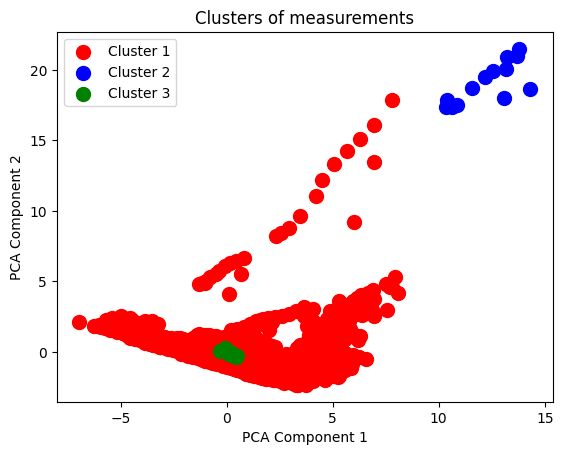

Silhouette Score for Spectral clustering: 0.12646829476490912
Accuracy Results for Spectral Clustering: 0.5111865258924082


In [215]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(data_pca2)

plt.scatter(data_pca2[y_spectral == 0, 0], data_pca2[y_spectral == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca2[y_spectral == 1, 0], data_pca2[y_spectral == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca2[y_spectral == 2, 0], data_pca2[y_spectral == 2, 1], s=100, c='green', label='Cluster 3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

s2_spectral = silhouette_score(data_pca2, y_spectral)
print('Silhouette Score for Spectral clustering:', s2_spectral)

# Checking accuracy for Spectral Clustering
k = 3
spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(data_pca2)

distances_spectral = pairwise_distances(data_pca2, cluster_centers, metric='euclidean')
cluster_accuracy_spectral = []

for cluster_idx in range(k):
    cluster_distances_spectral = distances_spectral[:, cluster_idx]
    sorted_indices_spectral = np.argsort(cluster_distances_spectral)
    num_points_in_cluster_spectral = np.sum(cluster_labels_spectral == cluster_idx)
    nearest_distances_indices_spectral = sorted_indices_spectral[:num_points_in_cluster_spectral]
    correct_labels_count_spectral = np.sum(cluster_labels_spectral[nearest_distances_indices_spectral] == cluster_idx)
    cluster_accuracy_spectral.append(correct_labels_count_spectral / num_points_in_cluster_spectral)
    

overall_accuracy_M2_spectral = np.mean(cluster_accuracy_spectral)
print("Accuracy Results for Spectral Clustering:", overall_accuracy_M2_spectral)


## <font color='purple'> Hierarchy Clustring

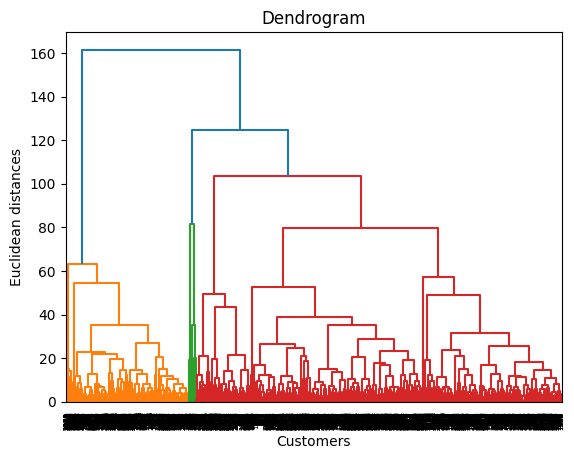

In [216]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [217]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Compute the hierarchical clustering
Z = linkage(data_pca2, method='ward')

# Determine cluster labels
n_clusters = 4
y_hc = fcluster(Z, n_clusters, criterion='maxclust')

print("Cluster labels:", y_hc)


Cluster labels: [4 1 1 ... 4 4 4]


Unique cluster labels: [1 2 3 4]


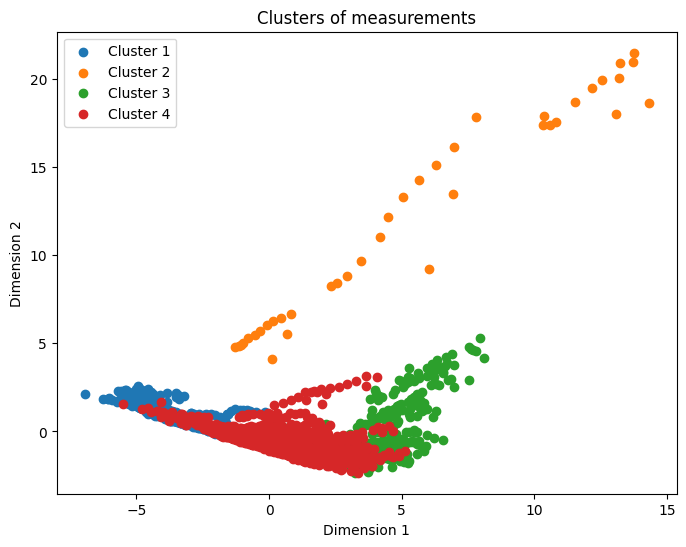

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Check unique cluster labels
unique_labels = np.unique(y_hc)
print("Unique cluster labels:", unique_labels)

# Plot clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    plt.scatter(data_pca2[y_hc == label, 0], data_pca2[y_hc == label, 1], label=f'Cluster {label}')

plt.title('Clusters of measurements')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [219]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(y_hc)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)

                      Country  Encoded_Value  Cluster
0                     Algeria              2        4
1                      Angola              5        1
2                       Benin             20        1
3                    Botswana             25        1
4                Burkina Faso             29        1
..                        ...            ...      ...
203  Turks and Caicos Islands            193        4
204             United States            198        4
205                   Uruguay            199        4
206             Venezuela, RB            202        4
207     Virgin Islands (U.S.)            204        1

[208 rows x 3 columns]


In [220]:
## Accuracy check
s2_hierarchy = silhouette_score(data_pca2,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.24465417570854692


In [221]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np

# Perform Hierarchical Clustering
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters)
hc_labels = hc.fit_predict(data_pca2)

# Calculate cluster centers
cluster_centers = np.array([data_pca2[hc_labels == i].mean(axis=0) for i in range(n_clusters)])

# Check cluster_centers array shape and contents
print(f"Cluster centers for n_clusters={n_clusters}:")
print(cluster_centers)
print(f"Shape: {cluster_centers.shape}")

# Calculate pairwise distances from each point to its cluster centroid
distances = pairwise_distances(data_pca2, cluster_centers, metric='euclidean')

cluster_accuracy = []

# Calculate accuracy for each cluster
for cluster_idx in range(n_clusters):
    # Get distances for current cluster
    cluster_distances = distances[:, cluster_idx]
    
    # Sort distances and get indices
    sorted_indices = np.argsort(cluster_distances)
    
    # Number of points in the current cluster
    num_points_in_cluster = np.sum(hc_labels == cluster_idx)
    
    # Select top num_points_in_cluster distances
    nearest_distances_indices = sorted_indices[:num_points_in_cluster]
    
    # Count correct labels (same as cluster label)
    correct_labels_count = np.sum(hc_labels[nearest_distances_indices] == cluster_idx)
    
    # Calculate accuracy for the current cluster
    cluster_accuracy.append(correct_labels_count / num_points_in_cluster)

# Calculate overall accuracy (mean of cluster accuracies)
overall_accuracy_M2_hierarchial = np.mean(cluster_accuracy)
print(f"Accuracy for Hierarchical Clustering with n_clusters={n_clusters}: {overall_accuracy_M2_hierarchial:.2f}")


Cluster centers for n_clusters=4:
[[ 5.65429337e+00  1.22380404e+01  3.54044244e+00 -1.17486172e+00
  -8.89368671e-01  5.60616973e-01  2.08473053e-02  7.18613981e-01
   4.90850743e-01 -1.95942102e-01 -1.19542985e+00 -1.17103674e+00
   2.34053969e-01 -1.09500797e-02  4.47912821e-01]
 [-3.63197720e+00  9.59678805e-01 -6.02424536e-01  1.40513087e-01
  -6.63809663e-02  7.86480320e-02  3.22972566e-01 -1.22105565e-01
  -5.21660529e-02  1.30260241e-01 -1.40568986e-01  3.61664715e-02
  -1.38936526e-01  1.63207952e-01 -2.33820970e-02]
 [ 5.19497700e-01 -6.78619185e-01  4.23321461e-01 -8.70115964e-02
   7.16349361e-02 -7.99072871e-02 -1.94735648e-01  3.11577735e-02
   6.55815032e-03 -3.15053946e-02  1.23944045e-01  3.32223120e-02
  -2.19063356e-03 -1.60484786e-01 -2.30088503e-02]
 [ 4.48372206e+00  7.30226825e-02 -1.50936691e+00  3.31609252e-01
  -1.39313129e-01  2.01894828e-01  3.73847661e-01  3.52964398e-03
   1.55452505e-02 -8.87737556e-02 -2.28423831e-01 -1.15304914e-01
   2.94180115e-01  5.

# <font color='purple'> DBSCAN

In [222]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca2)

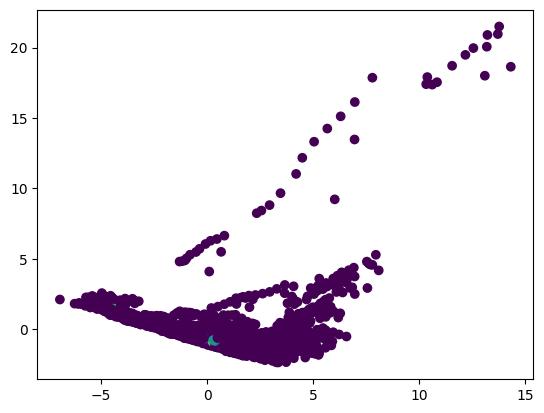

In [223]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [224]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(dbscan_labels)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)

                      Country  Encoded_Value  Cluster
0                     Algeria              2       -1
1                      Angola              5       -1
2                       Benin             20       -1
3                    Botswana             25       -1
4                Burkina Faso             29       -1
..                        ...            ...      ...
203  Turks and Caicos Islands            193       -1
204             United States            198       -1
205                   Uruguay            199       -1
206             Venezuela, RB            202       -1
207     Virgin Islands (U.S.)            204       -1

[208 rows x 3 columns]


In [225]:
data2['cluster']=dbscan.labels_

In [226]:
# Perform DBSCAN clustering
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_pca2)

# Extract unique cluster labels (excluding noise)

# Calculate cluster centers
cluster_centers = np.array([data_pca2[dbscan_labels == cluster].mean(axis=0) for cluster in dbscan_labels])

# Check cluster_centers array shape and contents
print(f"Cluster centers for DBSCAN (excluding noise):")
print(cluster_centers)
print(f"Shape: {cluster_centers.shape}")

# Calculate pairwise distances from each point to its cluster centroid
distances = pairwise_distances(data_pca2, cluster_centers, metric='euclidean')

cluster_accuracy = []

# Calculate accuracy for each cluster
for cluster_idx, cluster_label in enumerate(dbscan_labels):
    # Get distances for current cluster
    cluster_distances = distances[:, cluster_idx]
    
    # Sort distances and get indices
    sorted_indices = np.argsort(cluster_distances)
    
    # Number of points in the current cluster
    num_points_in_cluster = np.sum(dbscan_labels == cluster_label)
    
    # Select top num_points_in_cluster distances
    nearest_distances_indices = sorted_indices[:num_points_in_cluster]
    
    # Count correct labels (same as cluster label)
    correct_labels_count = np.sum(dbscan_labels[nearest_distances_indices] == cluster_label)
    
    # Calculate accuracy for the current cluster
    cluster_accuracy.append(correct_labels_count / num_points_in_cluster)

# Calculate overall accuracy (mean of cluster accuracies)
overall_accuracy_M2_DBSCAN = np.mean(cluster_accuracy)
print(f"Accuracy for DBSCAN with eps={eps}, min_samples={min_samples}: {overall_accuracy_M2_DBSCAN:.2f}")


Cluster centers for DBSCAN (excluding noise):
[[ 0.00904644  0.01187539 -0.00550284 ...  0.01140336 -0.00361991
  -0.00151743]
 [ 0.00904644  0.01187539 -0.00550284 ...  0.01140336 -0.00361991
  -0.00151743]
 [ 0.00904644  0.01187539 -0.00550284 ...  0.01140336 -0.00361991
  -0.00151743]
 ...
 [ 0.00904644  0.01187539 -0.00550284 ...  0.01140336 -0.00361991
  -0.00151743]
 [ 0.00904644  0.01187539 -0.00550284 ...  0.01140336 -0.00361991
  -0.00151743]
 [ 0.00904644  0.01187539 -0.00550284 ...  0.01140336 -0.00361991
  -0.00151743]]
Shape: (2678, 15)
Accuracy for DBSCAN with eps=0.2, min_samples=5: 0.98


In [227]:
data2[data2['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0,-1
1,0.050,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.03400,22.000000,302.461048,...,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14673.0,2.343634e+10,0.05400,972.000000,210.000000,...,1.4,0.207,0.705,0.088,1337439,0.088,6.885000e+08,4.560000e+08,189.0,-1
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,8895.000000,175.000000,...,1.0,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198.0,-1
2701,0.015,41.900000,8529.0,7.0,85.000000,14673.0,5.000435e+10,0.08900,1308.000000,310.000000,...,1.5,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0,-1
2702,0.020,61.900000,8529.0,144.0,180.000000,14673.0,3.812862e+11,0.04600,593.000000,792.000000,...,1.0,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0,-1


In [228]:
s2_dbscan = silhouette_score(data_pca2, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s2_dbscan)


Silhouette Score for DBSCAN is: -0.42212292890271724


# <font color='green'>Method 3

## T-SNE

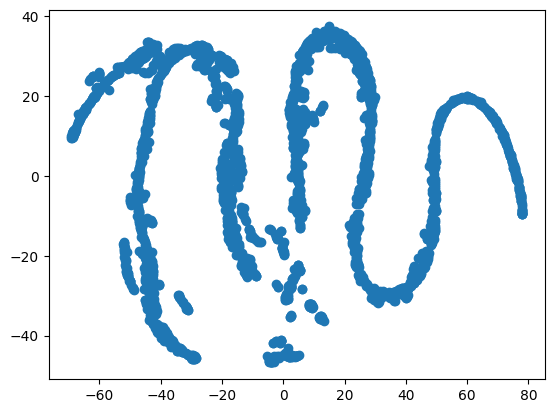

In [229]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data3)

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

In [230]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_tsne)

## <font color='purple'> K-means Clustring

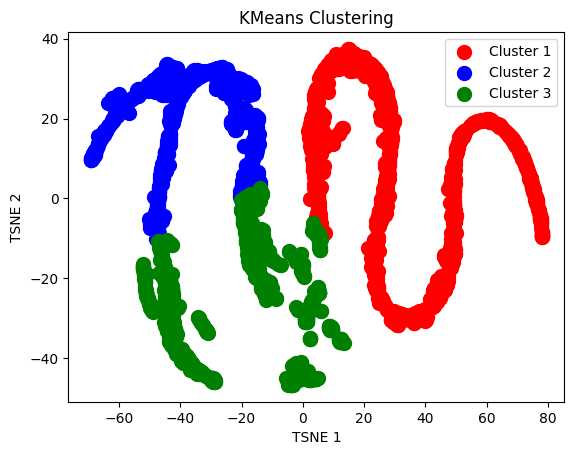

In [231]:
# Plot the clusters
plt.scatter(data_tsne[y_kmeans == 0, 0], data_tsne[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_kmeans == 1, 0], data_tsne[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_kmeans == 2, 0], data_tsne[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# Add labels and legend
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


In [232]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(y_kmeans)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)

                      Country  Encoded_Value  Cluster
0                     Algeria              2        0
1                      Angola              5        1
2                       Benin             20        1
3                    Botswana             25        1
4                Burkina Faso             29        1
..                        ...            ...      ...
203  Turks and Caicos Islands            193        0
204             United States            198        0
205                   Uruguay            199        2
206             Venezuela, RB            202        0
207     Virgin Islands (U.S.)            204        1

[208 rows x 3 columns]


In [233]:
## Accuracy check
s3_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s3_kmeans)


Silhouette Score for K-means clustring : 0.41507953


In [234]:
from sklearn.metrics import pairwise_distances
k_values = [ 3]
accuracy_results = []

for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_tsne)
    cluster_centers = kmeans.cluster_centers_
    
    # Check cluster_centers array shape and contents
    print(f"Cluster centers for k={k}:")
    print(cluster_centers)
    print(f"Shape: {cluster_centers.shape}")
    
    # Calculate pairwise distances from each point to its cluster centroid
    distances = pairwise_distances(data_tsne, cluster_centers, metric='euclidean')
    
    cluster_accuracy = []
    
    # Calculate accuracy for each cluster
    for cluster_idx in range(k):
        # Get distances for current cluster
        cluster_distances = distances[:, cluster_idx]
        
        # Sort distances and get indices
        sorted_indices = np.argsort(cluster_distances)
        
        # Number of points in the current cluster
        num_points_in_cluster = np.sum(cluster_labels == cluster_idx)
        
        # Select top num_points_in_cluster distances
        nearest_distances_indices = sorted_indices[:num_points_in_cluster]
        
        # Count correct labels (same as cluster label)
        correct_labels_count = np.sum(cluster_labels[nearest_distances_indices] == cluster_idx)
        
        # Calculate accuracy for the current cluster
        cluster_accuracy.append(correct_labels_count / num_points_in_cluster)
    
    # Calculate overall accuracy (mean of cluster accuracies)
    overall_accuracy_M3_kmeans = np.mean(cluster_accuracy)
    accuracy_results.append(overall_accuracy_M3_kmeans)
    print("Accuracy Results:",overall_accuracy_M3_kmeans)


Cluster centers for k=3:
[[ 33.145008    4.7078204]
 [-38.131245   18.16765  ]
 [-20.692934  -25.295403 ]]
Shape: (3, 2)
Accuracy Results: 0.9482332322112547


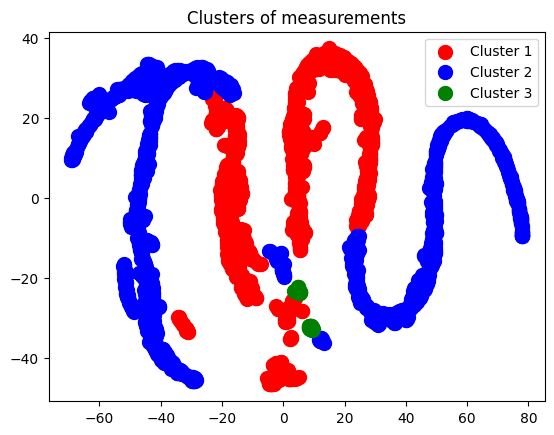

Silhouette Score for Spectral clustering: -0.09164784
Accuracy Results for Spectral Clustering: 0.349050708344876


In [235]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(data_tsne)

plt.scatter(data_tsne[y_spectral == 0, 0], data_tsne[y_spectral == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_tsne[y_spectral == 1, 0], data_tsne[y_spectral == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_tsne[y_spectral == 2, 0], data_tsne[y_spectral == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

s3_spectral = silhouette_score(data_tsne, y_spectral)
print('Silhouette Score for Spectral clustering:', s3_spectral)

# Checking accuracy for Spectral Clustering
k = 3
spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(data_tsne)

distances_spectral = pairwise_distances(data_tsne, cluster_centers, metric='euclidean')
cluster_accuracy_spectral = []

for cluster_idx in range(k):
    cluster_distances_spectral = distances_spectral[:, cluster_idx]
    sorted_indices_spectral = np.argsort(cluster_distances_spectral)
    num_points_in_cluster_spectral = np.sum(cluster_labels_spectral == cluster_idx)
    nearest_distances_indices_spectral = sorted_indices_spectral[:num_points_in_cluster_spectral]
    correct_labels_count_spectral = np.sum(cluster_labels_spectral[nearest_distances_indices_spectral] == cluster_idx)
    cluster_accuracy_spectral.append(correct_labels_count_spectral / num_points_in_cluster_spectral)

overall_accuracy_M3_spectral = np.mean(cluster_accuracy_spectral)
print("Accuracy Results for Spectral Clustering:", overall_accuracy_M3_spectral)


## <font color='purple'> Hierarchy Clustring

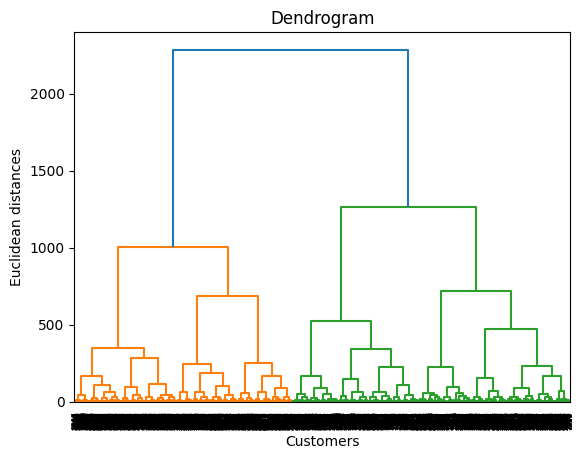

In [236]:
dendrogram = sch.dendrogram(sch.linkage(data_tsne, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [237]:
from scipy.cluster.hierarchy import linkage, fcluster

# Compute the hierarchical clustering and determine cluster labels
n_clusters = 4
y_hc = fcluster(linkage(data_tsne, method='ward'), n_clusters, criterion='maxclust')

print("Cluster labels:", y_hc)


Cluster labels: [1 4 3 ... 1 2 4]


Unique cluster labels: [1 2 3 4]


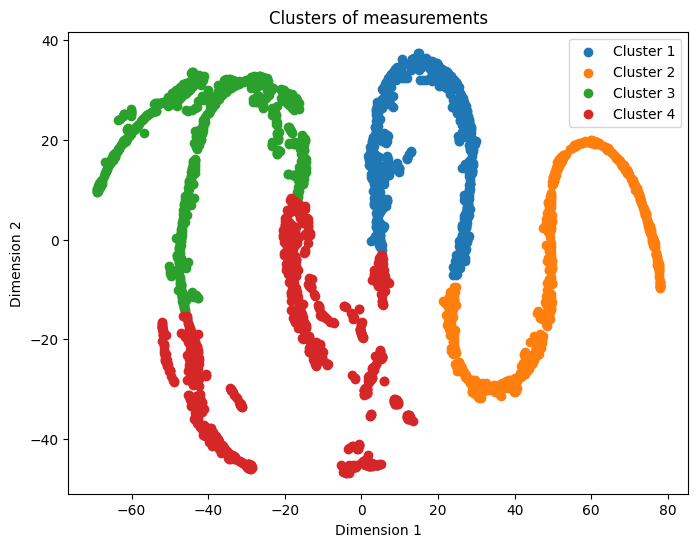

In [238]:
import numpy as np
import matplotlib.pyplot as plt

# Check unique cluster labels
unique_labels = np.unique(y_hc)
print("Unique cluster labels:", unique_labels)

# Plot clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    plt.scatter(data_tsne[y_hc == label, 0], data_tsne[y_hc == label, 1], label=f'Cluster {label}')

plt.title('Clusters of measurements')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [239]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(y_hc)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)

                      Country  Encoded_Value  Cluster
0                     Algeria              2        1
1                      Angola              5        4
2                       Benin             20        3
3                    Botswana             25        3
4                Burkina Faso             29        3
..                        ...            ...      ...
203  Turks and Caicos Islands            193        1
204             United States            198        2
205                   Uruguay            199        4
206             Venezuela, RB            202        1
207     Virgin Islands (U.S.)            204        4

[208 rows x 3 columns]


In [240]:
## Accuracy check
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.4084181


In [241]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np

# Perform Hierarchical Clustering
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters)
hc_labels = hc.fit_predict(data_tsne)

# Calculate cluster centers
cluster_centers = np.array([data_tsne[hc_labels == i].mean(axis=0) for i in range(n_clusters)])

# Check cluster_centers array shape and contents
print(f"Cluster centers for n_clusters={n_clusters}:")
print(cluster_centers)
print(f"Shape: {cluster_centers.shape}")

# Calculate pairwise distances from each point to its cluster centroid
distances = pairwise_distances(data_tsne, cluster_centers, metric='euclidean')

cluster_accuracy = []

# Calculate accuracy for each cluster
for cluster_idx in range(n_clusters):
    # Get distances for current cluster
    cluster_distances = distances[:, cluster_idx]
    
    # Sort distances and get indices
    sorted_indices = np.argsort(cluster_distances)
    
    # Number of points in the current cluster
    num_points_in_cluster = np.sum(hc_labels == cluster_idx)
    
    # Select top num_points_in_cluster distances
    nearest_distances_indices = sorted_indices[:num_points_in_cluster]
    
    # Count correct labels (same as cluster label)
    correct_labels_count = np.sum(hc_labels[nearest_distances_indices] == cluster_idx)
    
    # Calculate accuracy for the current cluster
    cluster_accuracy.append(correct_labels_count / num_points_in_cluster)

# Calculate overall accuracy (mean of cluster accuracies)
overall_accuracy_M3_hierarchial = np.mean(cluster_accuracy)
print(f"Accuracy for Hierarchical Clustering with n_clusters={n_clusters}: {overall_accuracy_M3_hierarchial:.2f}")


Cluster centers for n_clusters=4:
[[-18.628803 -22.979853]
 [ 49.50107   -6.401791]
 [-40.28852   17.950228]
 [ 15.855495  17.955564]]
Shape: (4, 2)
Accuracy for Hierarchical Clustering with n_clusters=4: 0.92


In [242]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_tsne)


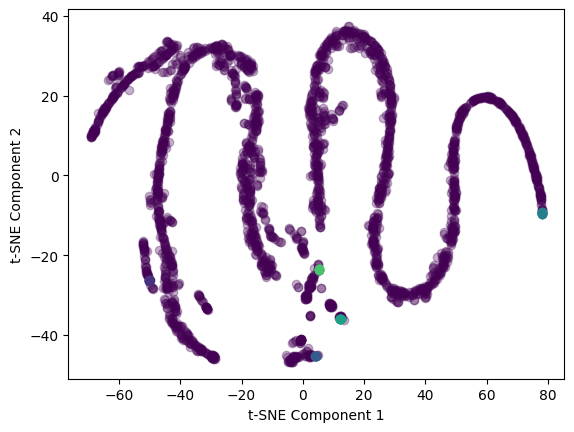

In [243]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap
cmap = plt.cm.get_cmap('viridis')

# Count the number of points in each cluster
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)

# Find the cluster with the maximum number of points
max_count_label = unique_labels[np.argmax(counts)]

# Scatter plot with adjusted transparency
for label in unique_labels:
    if label == max_count_label:
        alpha = 0.3  # Light color for the cluster with the maximum number of points
    else:
        alpha = 1.0  # Dark color for remaining clusters
    
    # Get the color for the current cluster label from the colormap
    color = cmap(label / len(unique_labels))
    
    # Plot points belonging to the current cluster with the specified color and transparency
    plt.scatter(data_tsne[dbscan_labels == label, 0], data_tsne[dbscan_labels == label, 1], color=color, alpha=alpha)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')


plt.show()


In [244]:
# Create a DataFrame mapping encoded values to country names
country_cluster_df = pd.DataFrame({'Country': country_names, 'Encoded_Value': encoded_values})

# Merge the country_cluster_df with the cluster labels
country_cluster_df['Cluster'] = pd.Series(dbscan_labels)

# Display the DataFrame with country names, encoded values, and cluster labels
print(country_cluster_df)


                      Country  Encoded_Value  Cluster
0                     Algeria              2       -1
1                      Angola              5       -1
2                       Benin             20       -1
3                    Botswana             25       -1
4                Burkina Faso             29       -1
..                        ...            ...      ...
203  Turks and Caicos Islands            193       -1
204             United States            198       -1
205                   Uruguay            199       -1
206             Venezuela, RB            202       -1
207     Virgin Islands (U.S.)            204       -1

[208 rows x 3 columns]


In [245]:
data3['cluster']=dbscan.labels_

In [246]:
# Perform DBSCAN clustering
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_tsne)

# Extract unique cluster labels (excluding noise)

# Calculate cluster centers
cluster_centers = np.array([data_tsne[dbscan_labels == cluster].mean(axis=0) for cluster in dbscan_labels])

# Check cluster_centers array shape and contents
print(f"Cluster centers for DBSCAN (excluding noise):")
print(cluster_centers)
print(f"Shape: {cluster_centers.shape}")

# Calculate pairwise distances from each point to its cluster centroid
distances = pairwise_distances(data_tsne, cluster_centers, metric='euclidean')

cluster_accuracy = []

# Calculate accuracy for each cluster
for cluster_idx, cluster_label in enumerate(dbscan_labels):
    # Get distances for current cluster
    cluster_distances = distances[:, cluster_idx]
    
    # Sort distances and get indices
    sorted_indices = np.argsort(cluster_distances)
    
    # Number of points in the current cluster
    num_points_in_cluster = np.sum(dbscan_labels == cluster_label)
    
    # Select top num_points_in_cluster distances
    nearest_distances_indices = sorted_indices[:num_points_in_cluster]
    
    # Count correct labels (same as cluster label)
    correct_labels_count = np.sum(dbscan_labels[nearest_distances_indices] == cluster_label)
    
    # Calculate accuracy for the current cluster
    cluster_accuracy.append(correct_labels_count / num_points_in_cluster)

# Calculate overall accuracy (mean of cluster accuracies)
overall_accuracy_M3_DBSCAN = np.mean(cluster_accuracy)
print(f"Accuracy for DBSCAN with eps={eps}, min_samples={min_samples}: {overall_accuracy_M3_DBSCAN:.2f}")


Cluster centers for DBSCAN (excluding noise):
[[-1.2054935   0.01791072]
 [-1.2054935   0.01791072]
 [-1.2054935   0.01791072]
 ...
 [-1.2054935   0.01791072]
 [-1.2054935   0.01791072]
 [-1.2054935   0.01791072]]
Shape: (2678, 2)
Accuracy for DBSCAN with eps=0.2, min_samples=5: 0.99


In [247]:
data3[data3['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342000,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0,-1
1,0.050,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.03400,22.000000,302.461048,...,0.0,0.476000,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454000,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383000,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468000,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14673.0,2.343634e+10,0.05400,972.000000,210.000000,...,1.4,0.207000,0.705,0.088,1337439,0.088,6.885000e+08,4.560000e+08,189.0,-1
2699,0.020,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,801.397077,302.461048,...,0.5,0.303062,0.642,0.052,32427,0.911,6.885000e+08,4.560000e+08,193.0,-1
2701,0.015,41.900000,8529.0,7.0,85.000000,14673.0,5.000435e+10,0.08900,1308.000000,310.000000,...,1.5,0.220000,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0,-1
2702,0.020,61.900000,8529.0,144.0,180.000000,14673.0,3.812862e+11,0.04600,593.000000,792.000000,...,1.0,0.288000,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0,-1


In [248]:
s3_dbscan = silhouette_score(data_tsne, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s3_dbscan)


Silhouette Score for DBSCAN is: -0.38626638


In [249]:
df = pd.DataFrame({'Method':['M1 kmeans','M1 Spectral', 'M1 hierarchy', 'M1 DBSCAN', 'M2 kmeans','M2 Spectral', 'M2 hierarchy', 'M2 DBSCAN', 'M3 kmeans','M3 Spectral', 'M3 hierarchy', 'M3 DBSCAN'],
                   'Silhouette Score':[s1_kmeans,s1_spectral,s1_hierarchy,s1_dbscan,s2_kmeans,s2_spectral,s2_hierarchy,s2_dbscan,s3_kmeans,s3_spectral,s3_hierarchy,s3_dbscan]})
# Style the DataFrame
styled_df = df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'border': '1px solid black'
})

# Additional CSS to ensure the whole background is white
styled_df = styled_df.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }, {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }, {
        'selector': 'tbody',
        'props': [('background-color', 'white')]
    }, {
        'selector': 'table',
        'props': [('background-color', 'white')]
    }]
)

# Display the styled DataFrame
styled_df


,Method,Silhouette Score
0,M1 kmeans,0.260265
1,M1 Spectral,-0.149818
2,M1 hierarchy,0.169360
3,M1 DBSCAN,-0.317251
4,M2 kmeans,0.300157
5,M2 Spectral,0.126468
6,M2 hierarchy,0.244654
7,M2 DBSCAN,-0.422123
8,M3 kmeans,0.415080
9,M3 Spectral,-0.091648


In [250]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({
    'Method': ['M1 kmeans','M1 Spectral', 'M1 hierarchy', 'M1 DBSCAN', 'M2 kmeans','M2 Spectral', 'M2 hierarchy', 'M2 DBSCAN', 'M3 kmeans','M3 Spectral', 'M3 hierarchy', 'M3 DBSCAN'],
    'Accuracy(cluster compactness)': [
        overall_accuracy_M1_kmeans,
        overall_accuracy_M1_spectral,
        overall_accuracy_M1_hierarchial,
        overall_accuracy_M1_DBSCAN,
        overall_accuracy_M2_kmeans,
        overall_accuracy_M2_spectral,
        overall_accuracy_M2_hierarchial,
        overall_accuracy_M2_DBSCAN,
        overall_accuracy_M3_kmeans,
        overall_accuracy_M3_spectral,
        overall_accuracy_M3_hierarchial,
        overall_accuracy_M3_DBSCAN
    ]
})

# Style the DataFrame
styled_df = df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'border': '1px solid black'
})

# Additional CSS to ensure the whole background is white
styled_df = styled_df.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }, {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }, {
        'selector': 'tbody',
        'props': [('background-color', 'white')]
    }, {
        'selector': 'table',
        'props': [('background-color', 'white')]
    }]
)

# Display the styled DataFrame
styled_df


,Method,Accuracy(cluster compactness)
0,M1 kmeans,0.758887
1,M1 Spectral,0.411451
2,M1 hierarchy,0.668046
3,M1 DBSCAN,0.956360
4,M2 kmeans,0.856468
5,M2 Spectral,0.511187
6,M2 hierarchy,0.738495
7,M2 DBSCAN,0.976848
8,M3 kmeans,0.948233
9,M3 Spectral,0.349051
